# 01. Importing libraries and data

### Contents
    01. Importing libraries and data
    02. Comparing customer profiles with regions and departments
        a. Data check and subsetting
        b. Age Profile
        c. Income Profile
        d. Number of dependants Profile
        e. Baby stuff Profile
        f. Pet Profile
    03. Additional visualizations and analysis
    04. Exporting visualizations

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing data
path=r'C:\Users\munav\Desktop\bootcamps\Achievement 4\Instacart Basket Analysis'
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))

# 02. Comparing customer profiles with regions and departments

## a. Data check and subsetting

In [3]:
#Checking the imported data
df.shape

(30964564, 37)

In [4]:
df.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,department,region,activity,age_group,income_group,dependant_group,baby_status,pet_status,vegan_status,alcohol_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,beverages,South,1,young,low income,parent,0,0,1,0
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,beverages,South,1,young,low income,parent,0,0,1,0
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,beverages,South,1,young,low income,parent,0,0,1,0
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,beverages,South,1,young,low income,parent,0,0,1,0
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,beverages,South,1,young,low income,parent,0,0,1,0


In [5]:
df.tail()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,department,region,activity,age_group,income_group,dependant_group,baby_status,pet_status,vegan_status,alcohol_status
32404849,525976,58201,24,6,16,3.0,5161,1,1,Dried Mango,...,bulk,South,1,older,middle income,parent,0,0,1,0
32404850,758290,58201,26,0,12,9.0,5161,1,1,Dried Mango,...,bulk,South,1,older,middle income,parent,0,0,1,0
32404851,460711,58201,27,6,9,13.0,5161,1,1,Dried Mango,...,bulk,South,1,older,middle income,parent,0,0,1,0
32404852,1605789,58201,28,5,7,27.0,5161,1,1,Dried Mango,...,bulk,South,1,older,middle income,parent,0,0,1,0
32404855,1565024,152886,2,1,9,30.0,1000,3,0,Apricots,...,bulk,Northeast,1,middle,low income,parent,0,0,1,0


In [6]:
#Creating a subset with unique customers
df_unique=df.drop_duplicates(subset='customer_id')

## b. Age Profile

In [7]:
#Number of customer groups in each region
age_region=pd.crosstab(df_unique['region'], df_unique['age_group'].sort_values(ascending=False))
age_region=age_region.reindex(['young', 'middle', 'older'], axis="columns").reindex(['South', 'West', 'Midwest', 'Northeast'])
age_region

age_group,young,middle,older
region,,,
South,15350,16872,21971
West,11729,12948,16804
Midwest,10630,12243,15503
Northeast,7980,8986,11615


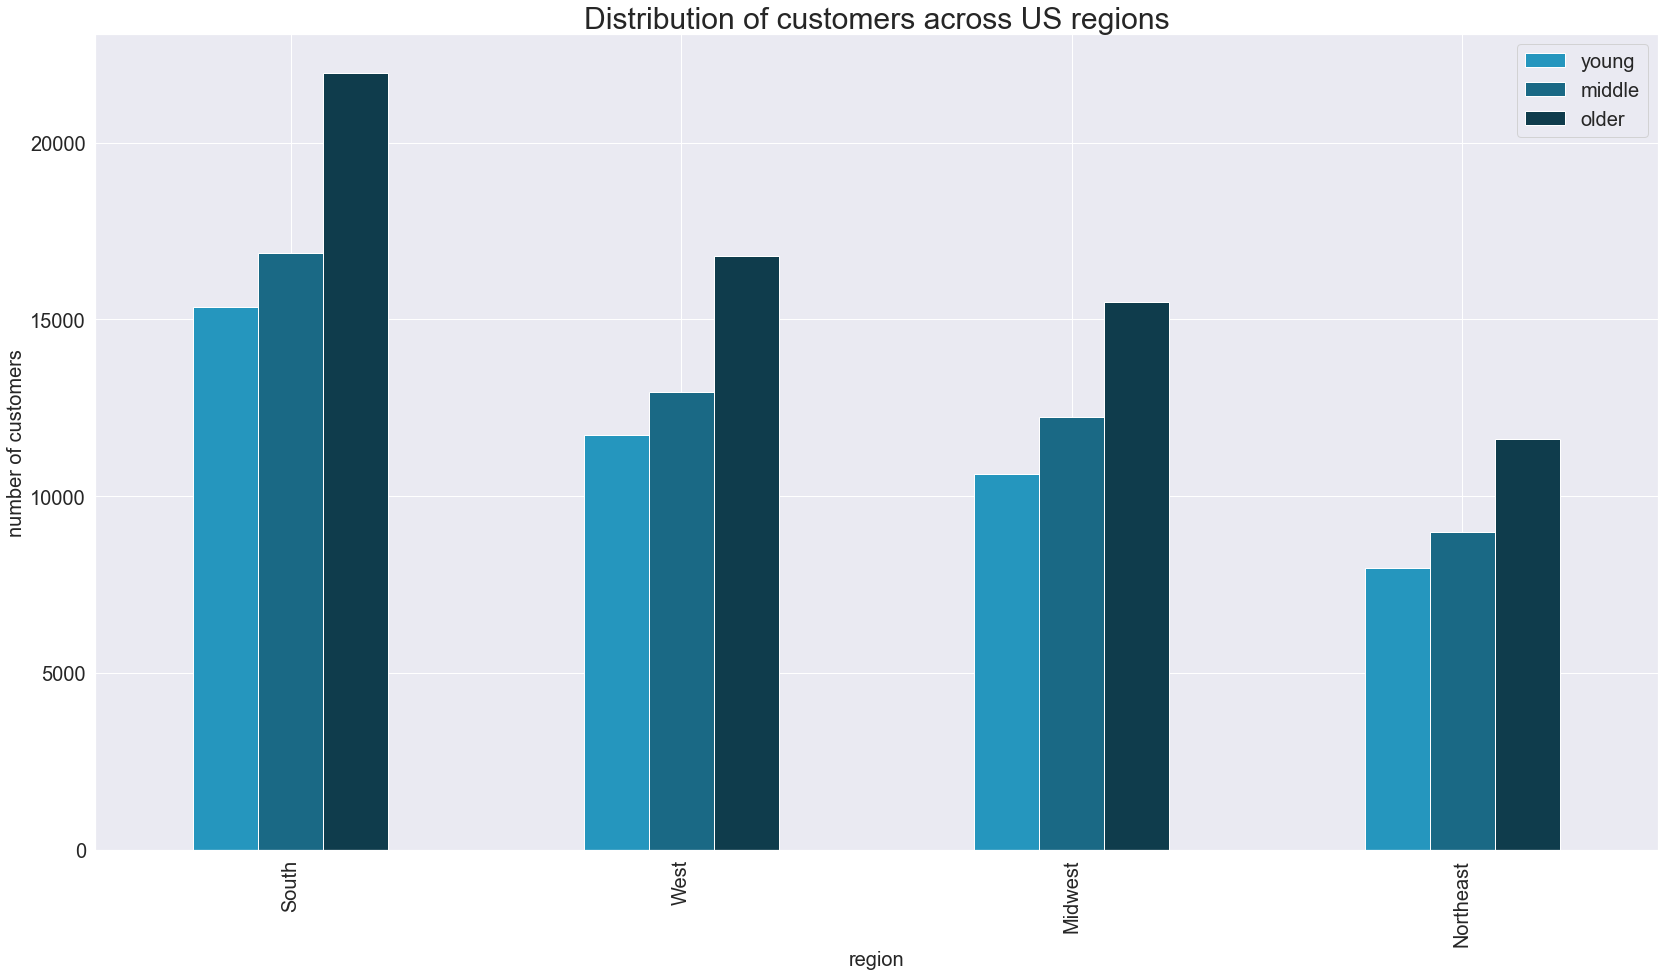

In [8]:
#Setting script figure size to 28,15
sns.set(rc = {'figure.figsize':(28,15)})
#Grouped bar chart of customer groups and regions
bar_age_region=age_region.plot.bar(color=['#2596be', '#1a6985','#0f3c4c'], fontsize=20)
plt.title('Distribution of customers across US regions', fontsize=30)
plt.xlabel('region', fontsize=20)
plt.ylabel('number of customers', fontsize=20)
plt.legend(fontsize=20)

In [9]:
#Number of orders per department
df['department'].value_counts(dropna=False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [92]:
#Distribution of orders by age
df['age_group'].value_counts()

older     65893
middle    51049
young     45689
Name: age_group, dtype: int64

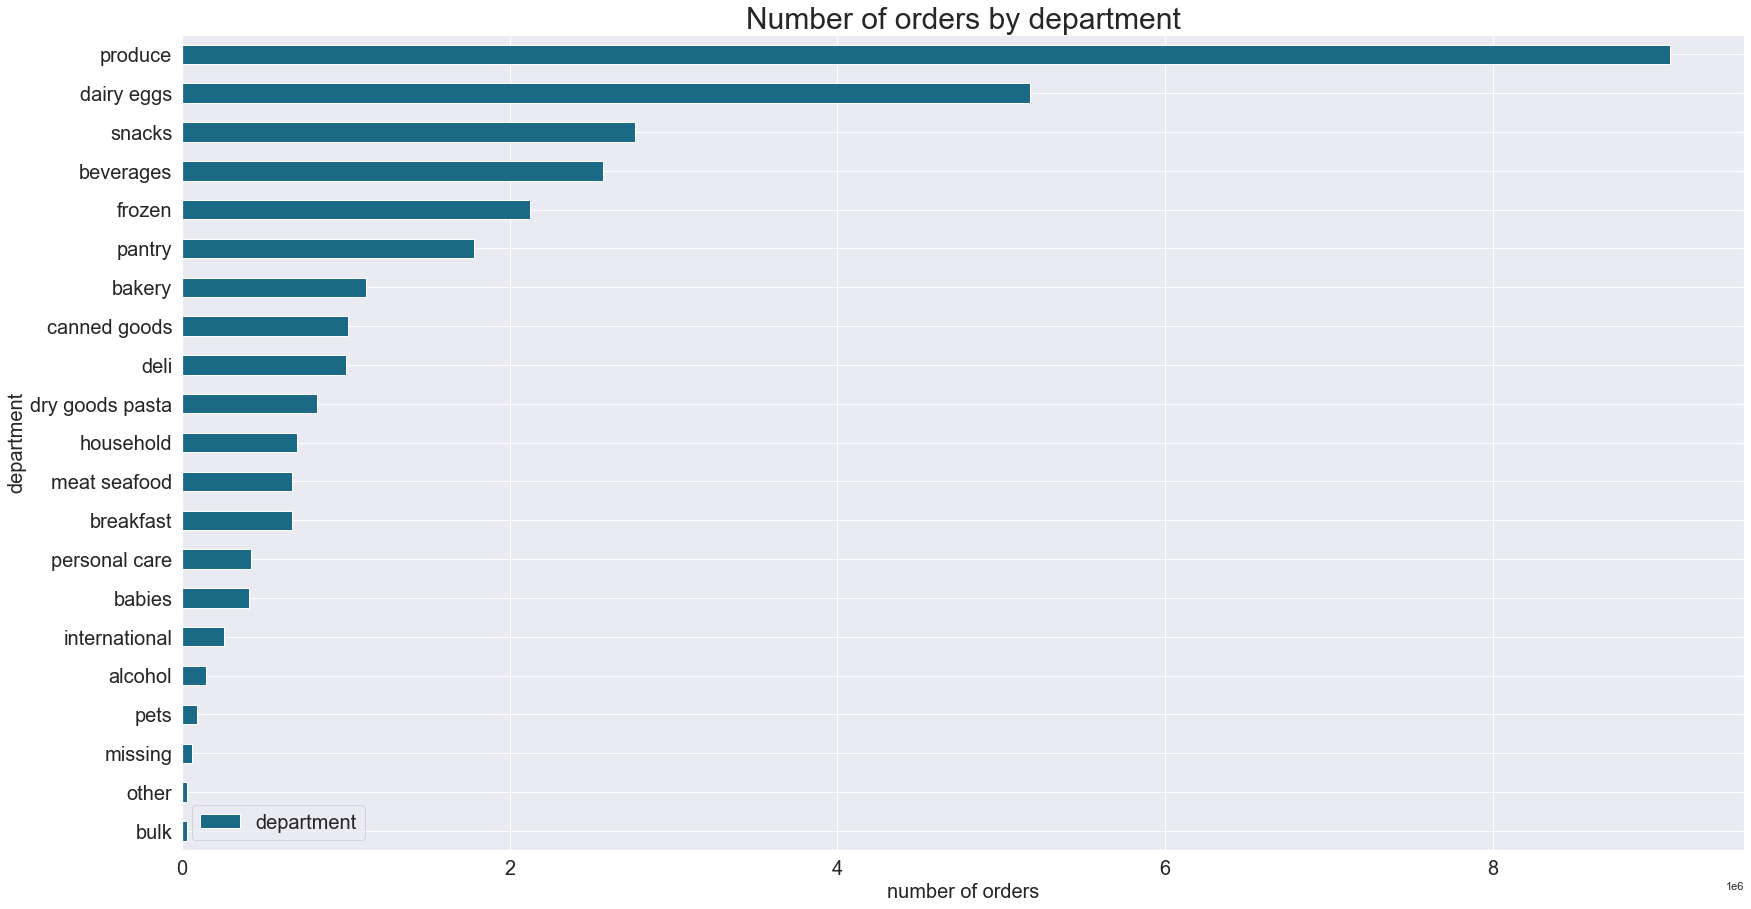

In [10]:
#Number of orders across departments
bar_department_orders=df['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(color=['#1a6985'], fontsize=20)
plt.title('Number of orders by department', fontsize=30)
plt.xlabel('number of orders', fontsize=20)
plt.ylabel('department', fontsize=20)
plt.legend(fontsize=20)

In [11]:
#Distribution of orders by age groups across  departments
age_department=pd.crosstab(df['department'], df['age_group'])
age_department=age_department.reindex(['young', 'middle', 'older'], axis="columns")
age_department

age_group,young,middle,older
department,,,
alcohol,42385,44903,57339
babies,113465,134036,162891
bakery,317031,351482,452315
beverages,717390,807910,1046601
breakfast,191417,210687,268746
bulk,9624,10373,13454
canned goods,287179,316980,407915
dairy eggs,1471526,1621495,2084161
deli,283863,313813,406158


In [12]:
df_age_department=df.loc[df['department'].isin(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])]

In [13]:
#creating cross tabs to display labels and age group/departments
age_department_5=pd.crosstab(index=df_age_department['department'], columns=df_age_department['age_group'], normalize='index')
age_department_5=age_department_5.reindex(['young', 'middle', 'older'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])
age_department_5_labels=pd.crosstab(index=df_age_department['department'], columns=df_age_department['age_group'])
age_department_5_labels=age_department_5_labels.reindex(['young', 'middle', 'older'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])

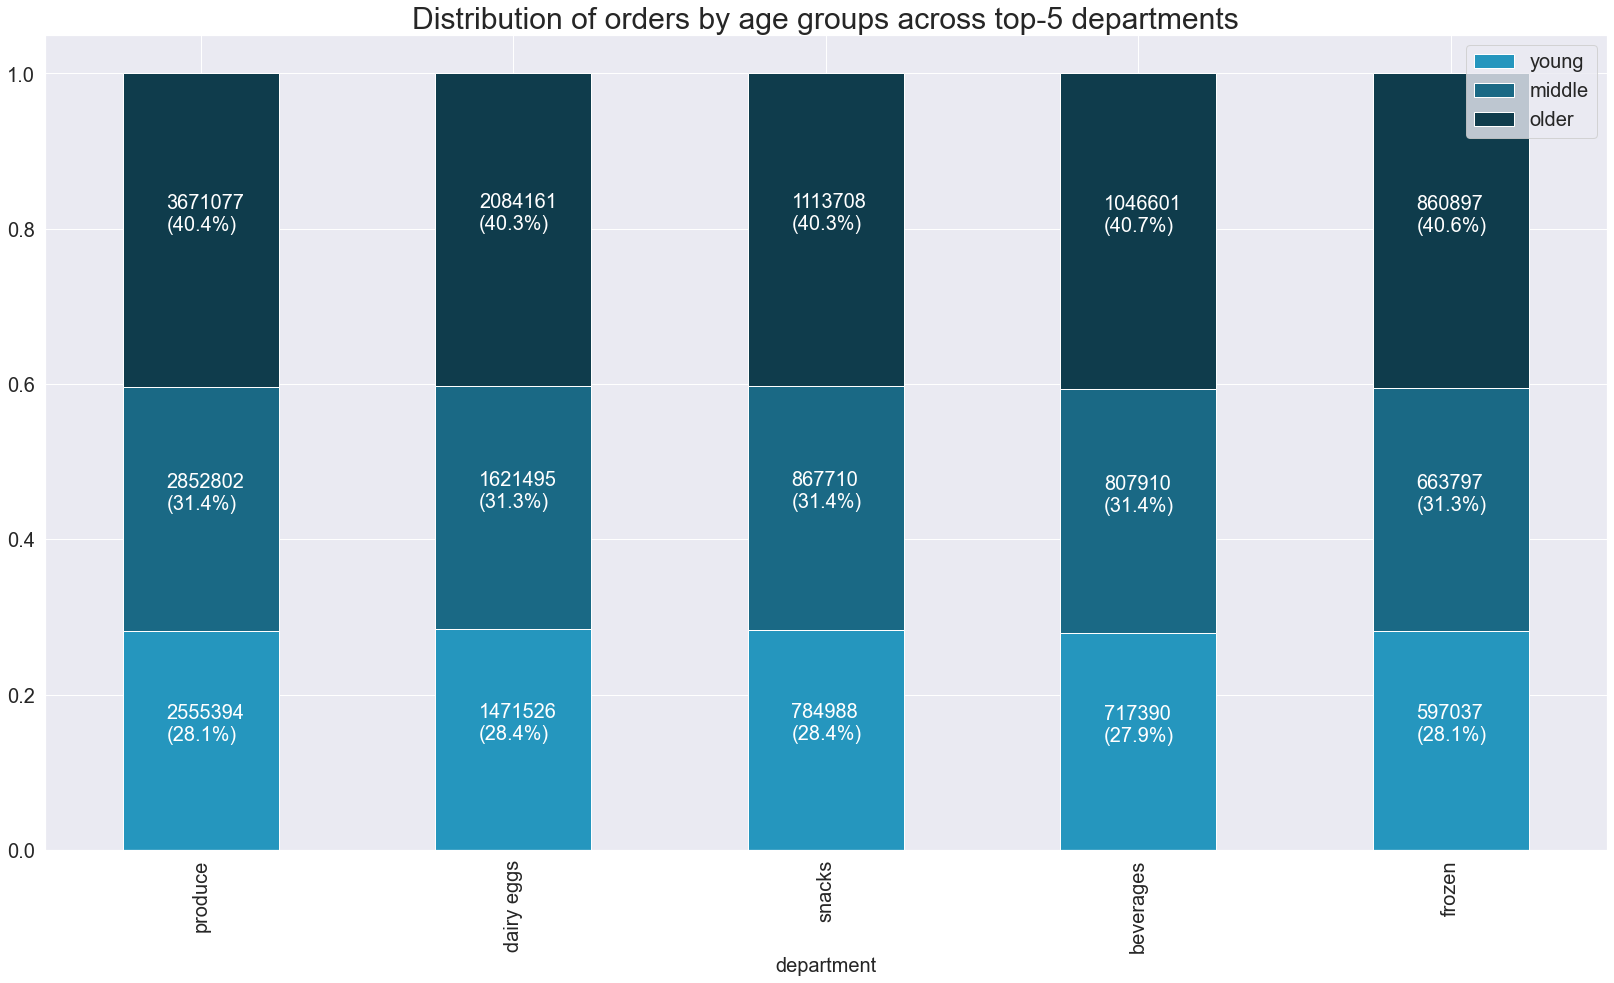

In [14]:
#Distribution of orders by age groups across top-5 departments
bar_age_department=age_department_5.plot.bar(stacked=True,color=['#2596be', '#1a6985','#0f3c4c'], fontsize=20)
plt.title('Distribution of orders by age groups across top-5 departments', fontsize=30)
plt.xlabel('department', fontsize=20)
plt.legend(fontsize=20)
for n, y in enumerate([*age_department_5.index.values]):
    for (proportion, count, x_loc) in zip(age_department_5.loc[y],
                                         age_department_5_labels.loc[y],
                                          age_department_5.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

In [15]:
#Orders by young aged customers
df.loc[df['age_group']=='young']['department'].value_counts()

produce            2555394
dairy eggs         1471526
snacks              784988
beverages           717390
frozen              597037
pantry              502847
bakery              317031
canned goods        287179
deli                283863
dry goods pasta     232581
household           195953
breakfast           191417
meat seafood        189392
personal care       118700
babies              113465
international        72913
alcohol              42385
pets                 26428
missing              18746
other                 9946
bulk                  9624
Name: department, dtype: int64

In [16]:
#Orders by middle aged customers
df.loc[df['age_group']=='middle']['department'].value_counts()

produce            2852802
dairy eggs         1621495
snacks              867710
beverages           807910
frozen              663797
pantry              558247
bakery              351482
canned goods        316980
deli                313813
dry goods pasta     257899
household           220152
breakfast           210687
meat seafood        209990
personal care       134559
babies              134036
international        80953
alcohol              44903
pets                 28497
missing              20401
other                10775
bulk                 10373
Name: department, dtype: int64

In [17]:
#Orders by older aged customers
df.loc[df['age_group']=='older']['department'].value_counts()

produce            3671077
dairy eggs         2084161
snacks             1113708
beverages          1046601
frozen              860897
pantry              721611
bakery              452315
canned goods        407915
deli                406158
dry goods pasta     331656
household           283752
meat seafood        275399
breakfast           268746
personal care       171047
babies              162891
international       102125
alcohol              57339
pets                 38135
missing              25621
other                13690
bulk                 13454
Name: department, dtype: int64

In [86]:
#Relationship between royalty flag and age group
age_loyalty=pd.crosstab(df_unique['age_group'], df_unique['loyalty_flag'].sort_values(ascending=False))
age_loyalty=age_loyalty.reindex(['young', 'middle', 'older'])
age_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
young,4706,19397,21586
middle,5367,21544,24138
older,6944,27809,31140


<AxesSubplot:>

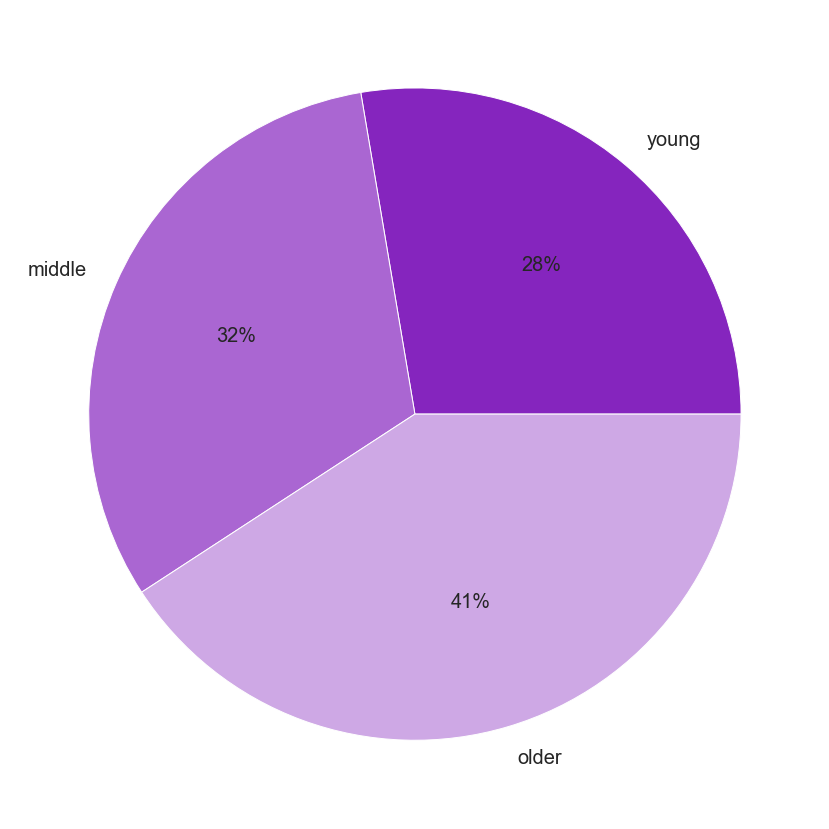

In [87]:
#Loyalty flag for young customers
pie_loyal_age=age_loyalty['Loyal customer'].plot.pie(label='',autopct=('%1.f%%'), colors=['#8525be','#aa66d2', '#cea8e5'], textprops={'fontsize': 20})
pie_loyal_age

<AxesSubplot:>

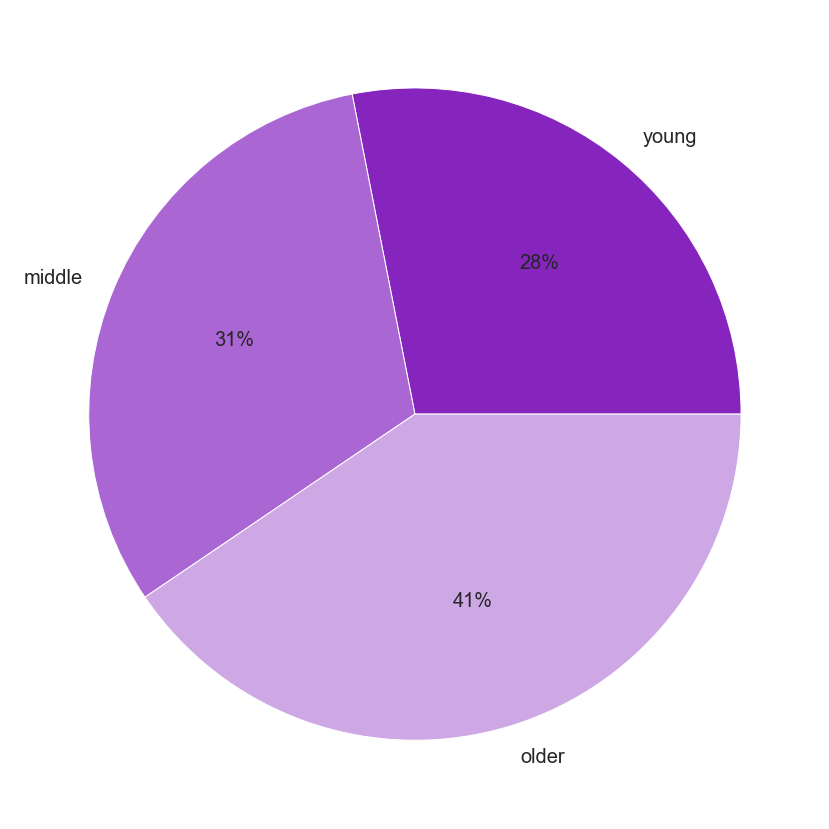

In [88]:
#Loyalty flags for middle aged customers
pie_regular_age=age_loyalty['Regular customer'].plot.pie(label='',autopct=('%1.f%%'), colors=['#8525be','#aa66d2', '#cea8e5'], textprops={'fontsize': 20})
pie_regular_age


<AxesSubplot:>

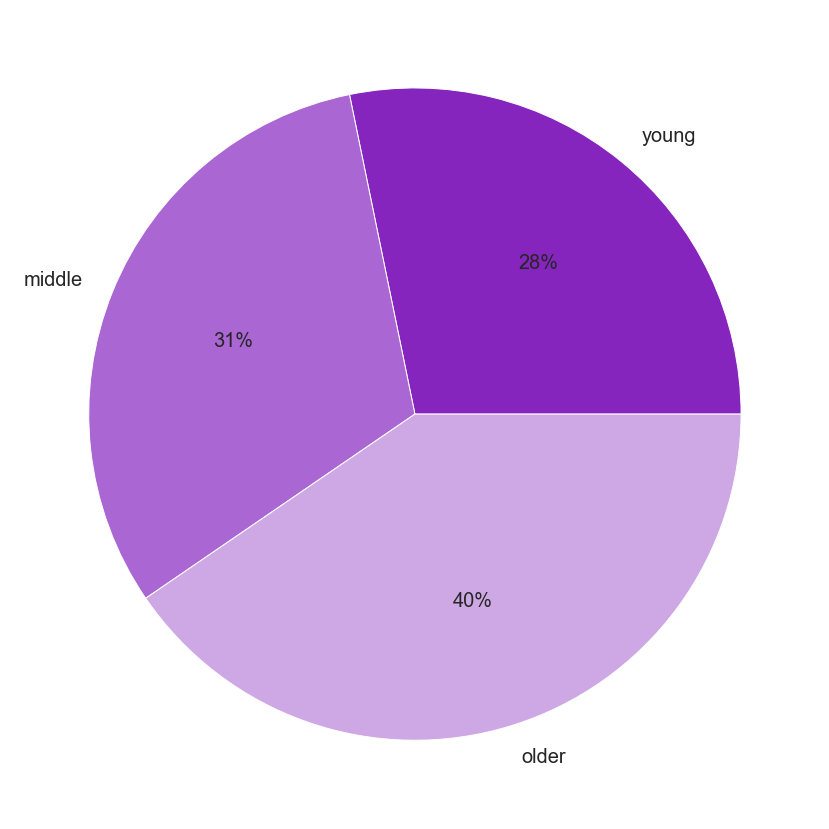

In [89]:
#Loyalty flags for older aged customers
pie_new_age=age_loyalty['New customer'].plot.pie(label='',autopct=('%1.f%%'), colors=['#8525be','#aa66d2', '#cea8e5'], textprops={'fontsize': 20})
pie_new_age

In [22]:
age_ordertime=pd.crosstab(df['order_hour_of_day'], df['age_group'])
age_ordertime=age_ordertime.reindex(['young', 'middle', 'older'], axis="columns")
age_ordertime

age_group,young,middle,older
order_hour_of_day,,,
0,60087,65633,82322
1,31144,35026,43451
2,19265,20094,26332
3,14213,14533,20050
4,14817,14508,21438
5,23824,25268,35326
6,81620,85669,113724
7,243698,265228,354287
8,465216,522162,671732


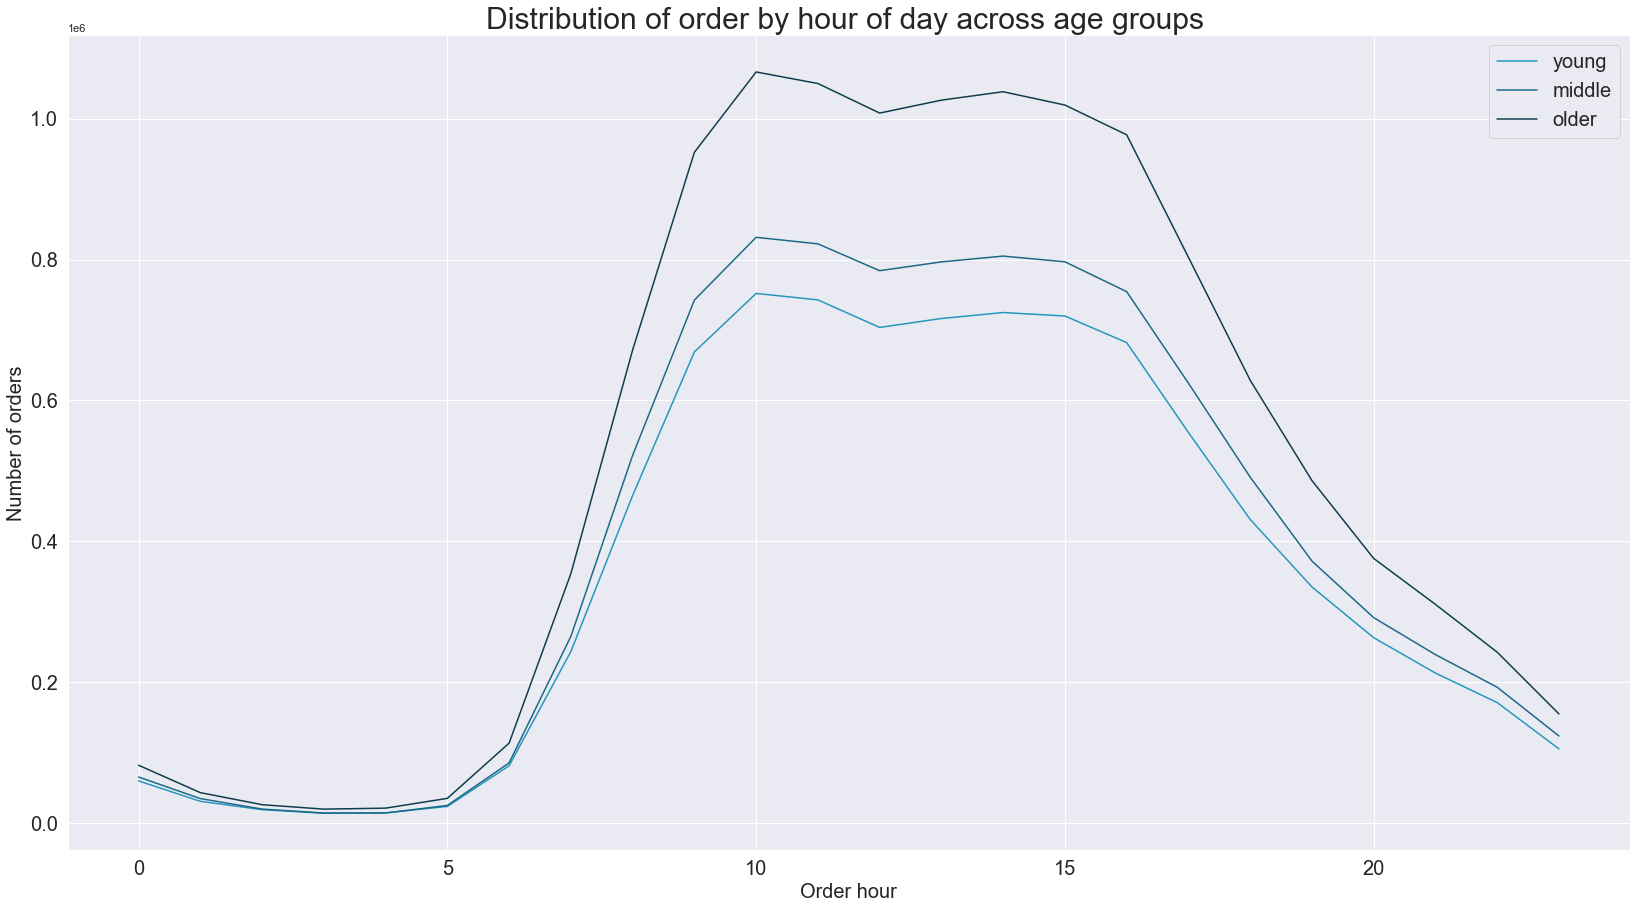

In [23]:
#Plotting linechart of orders by age groups
line_age_ordertime=age_ordertime.plot(kind='line', color=['#2596be', '#1a6985','#0f3c4c'], fontsize=20)
plt.title('Distribution of order by hour of day across age groups ', fontsize=30)
plt.xlabel('Order hour', fontsize=20)
plt.ylabel('Number of orders', fontsize=20)
plt.legend(fontsize=20)

In [24]:
#Orders by day of week
age_orderday=pd.crosstab(df['order_day_of_week'], df['age_group'])
age_orderday=age_orderday.reindex(['young', 'middle', 'older'], axis="columns").rename(index={0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'})
age_orderday

age_group,young,middle,older
order_day_of_week,,,
Saturday,1670484,1850453,2387673
Sunday,1546700,1691590,2173396
Monday,1127024,1271552,1626130
Tuesday,1030582,1148714,1490239
Wednesday,1027213,1138148,1459633
Thursday,1137321,1269172,1627236
Friday,1199481,1347832,1743991


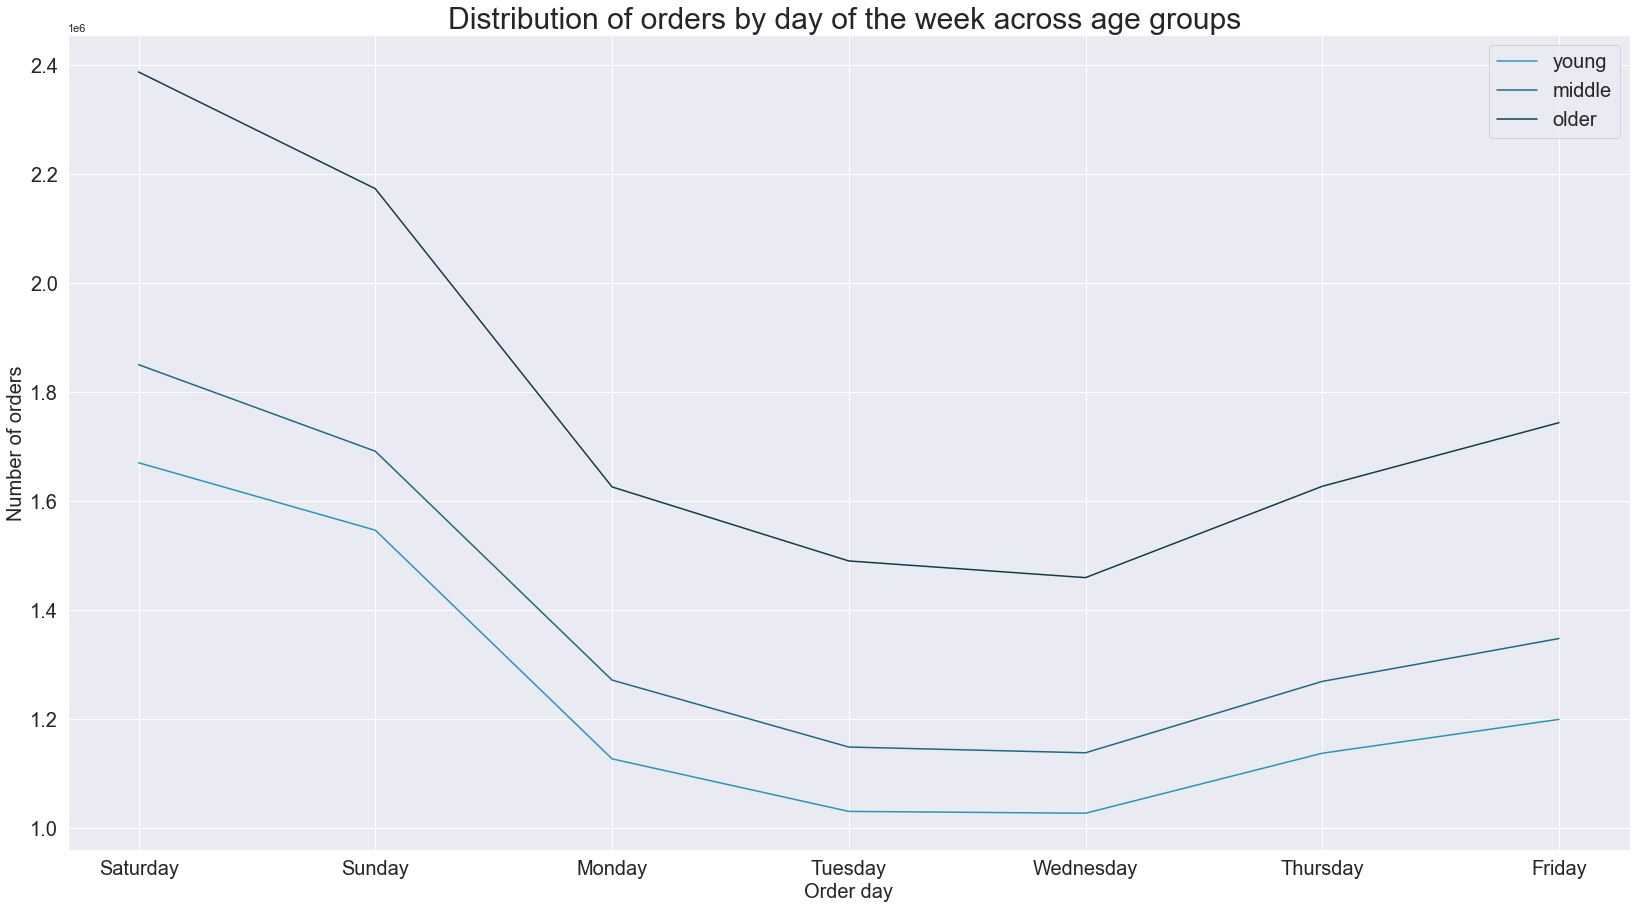

In [25]:
#Plotting linechart of orders by age groups
line_age_orderday=age_orderday.plot(kind='line', color=['#2596be', '#1a6985','#0f3c4c'], fontsize=20)
plt.title('Distribution of orders by day of the week across age groups ', fontsize=30)
plt.xlabel('Order day', fontsize=20)
plt.ylabel('Number of orders', fontsize=20)
plt.legend(fontsize=20)

## c. Income Profile

In [26]:
#Distribution of income groups across regions
income_region=pd.crosstab(df_unique['region'], df_unique['income_group'].sort_values(ascending=False))
income_region=income_region.reindex(['low income', 'middle income', 'high income'], axis="columns").reindex(['South', 'West', 'Midwest', 'Northeast'])
income_region

income_group,low income,middle income,high income
region,,,
South,8964,40707,4522
West,6837,31167,3477
Midwest,6312,28886,3178
Northeast,4705,21502,2374


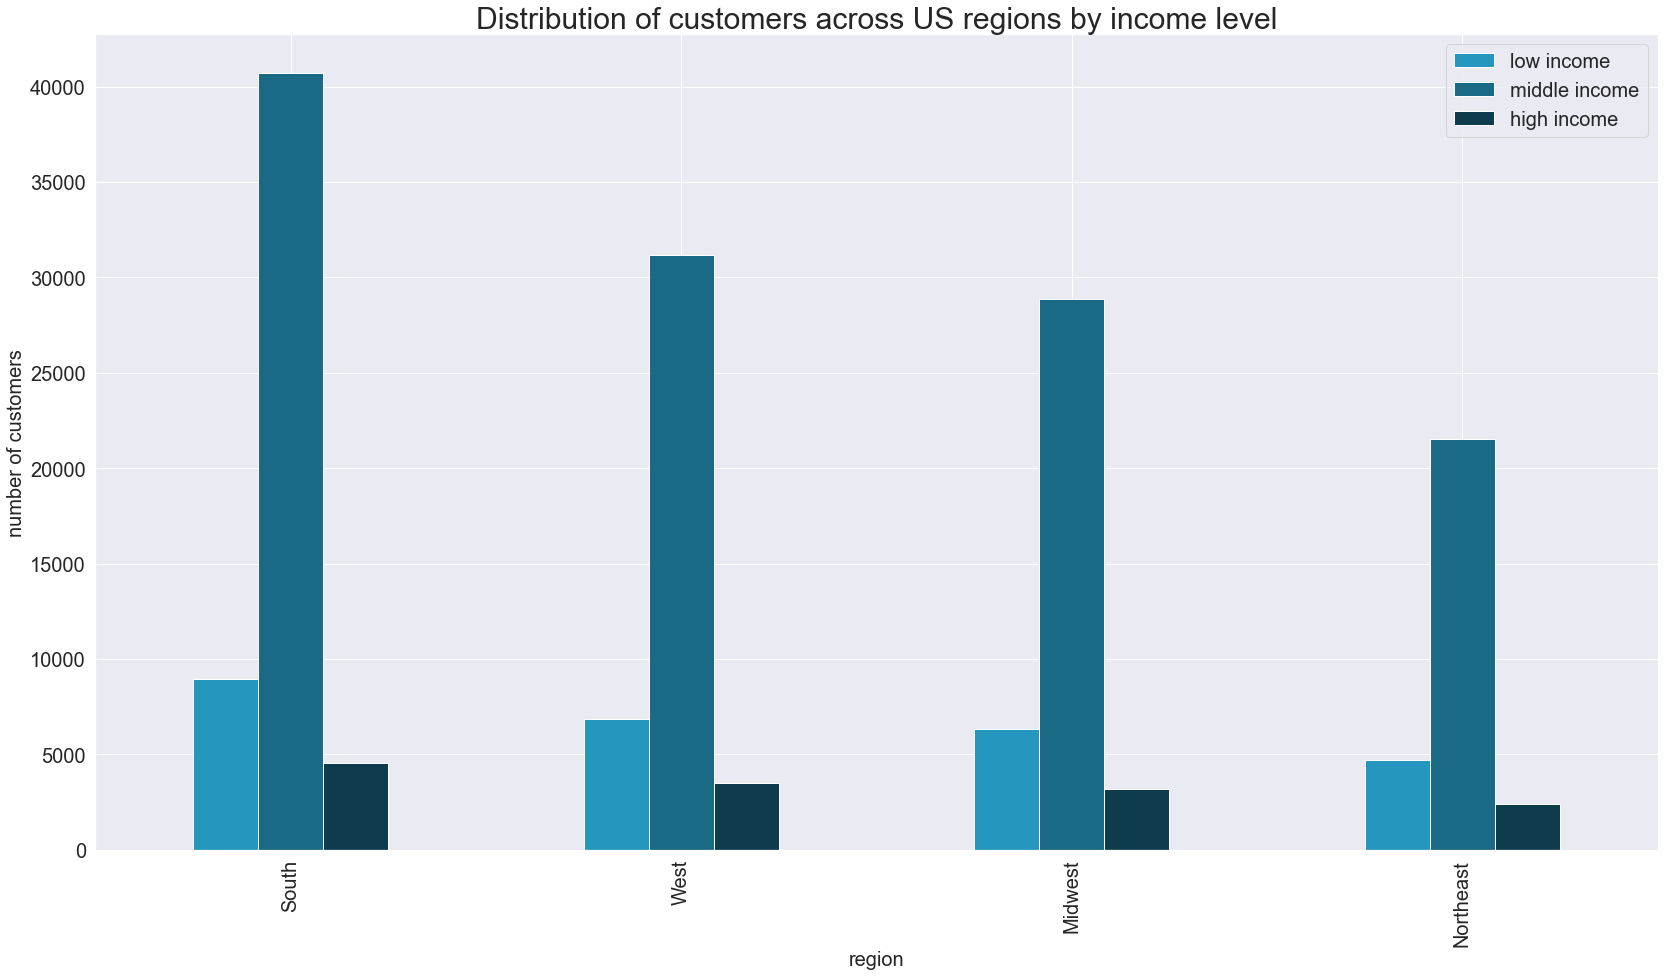

In [27]:
#Grouped bar chart of income groups and regions
bar_income_region=income_region.plot.bar(color=['#2596be', '#1a6985','#0f3c4c'], fontsize=20)
plt.title('Distribution of customers across US regions by income level', fontsize=30)
plt.xlabel('region', fontsize=20)
plt.ylabel('number of customers', fontsize=20)
plt.legend(fontsize=20)

In [28]:
#Orders by low income customers
df.loc[df['income_group']=='low income']['department'].value_counts()

produce            902493
snacks             593323
dairy eggs         544919
beverages          408018
frozen             233011
pantry             180435
bakery             115915
deli               114660
breakfast           97692
household           93115
canned goods        86727
dry goods pasta     71139
personal care       51346
meat seafood        38465
babies              33274
international       23449
alcohol             19180
pets                 9391
missing              7089
bulk                 4988
other                4163
Name: department, dtype: int64

In [29]:
#Orders by middle income customers
df.loc[df['income_group']=='middle income']['department'].value_counts()

produce            7359637
dairy eggs         4151072
snacks             1950583
beverages          1932979
frozen             1686122
pantry             1432511
bakery              894351
canned goods        827849
deli                796769
dry goods pasta     672485
meat seafood        569183
household           537812
breakfast           512955
babies              338678
personal care       333656
international       208478
alcohol             106432
pets                 73909
missing              51724
other                26957
bulk                 25984
Name: department, dtype: int64

In [30]:
#Orders by high income customers
df.loc[df['income_group']=='high income']['department'].value_counts()

produce            817143
dairy eggs         481191
beverages          230904
snacks             222500
frozen             202598
pantry             169759
bakery             110562
canned goods        97498
deli                92405
dry goods pasta     78512
household           68930
meat seafood        67133
breakfast           60203
personal care       39304
babies              38440
international       24064
alcohol             19015
pets                 9760
missing              5955
other                3291
bulk                 2479
Name: department, dtype: int64

In [31]:
#creating cross tabs to display labels and age group/departments
income_price=pd.crosstab(index=df['price_range'], columns=df['income_group'], normalize='index')
income_price=income_price.reindex(['low income', 'middle income', 'high income'], axis="columns").reindex(['Low-range product', 'Mid-range product', 'High-range product'])
income_price_label=pd.crosstab(index=df['price_range'], columns=df['income_group'])
income_price_label=income_price_label.reindex(['low income', 'middle income', 'high income'], axis="columns").reindex(['Low-range product', 'Mid-range product', 'High-range product'])
income_price_label

income_group,low income,middle income,high income
price_range,,,
Low-range product,1487516,7338091,849233
Mid-range product,2125284,16816639,1949848
High-range product,19992,335396,42565


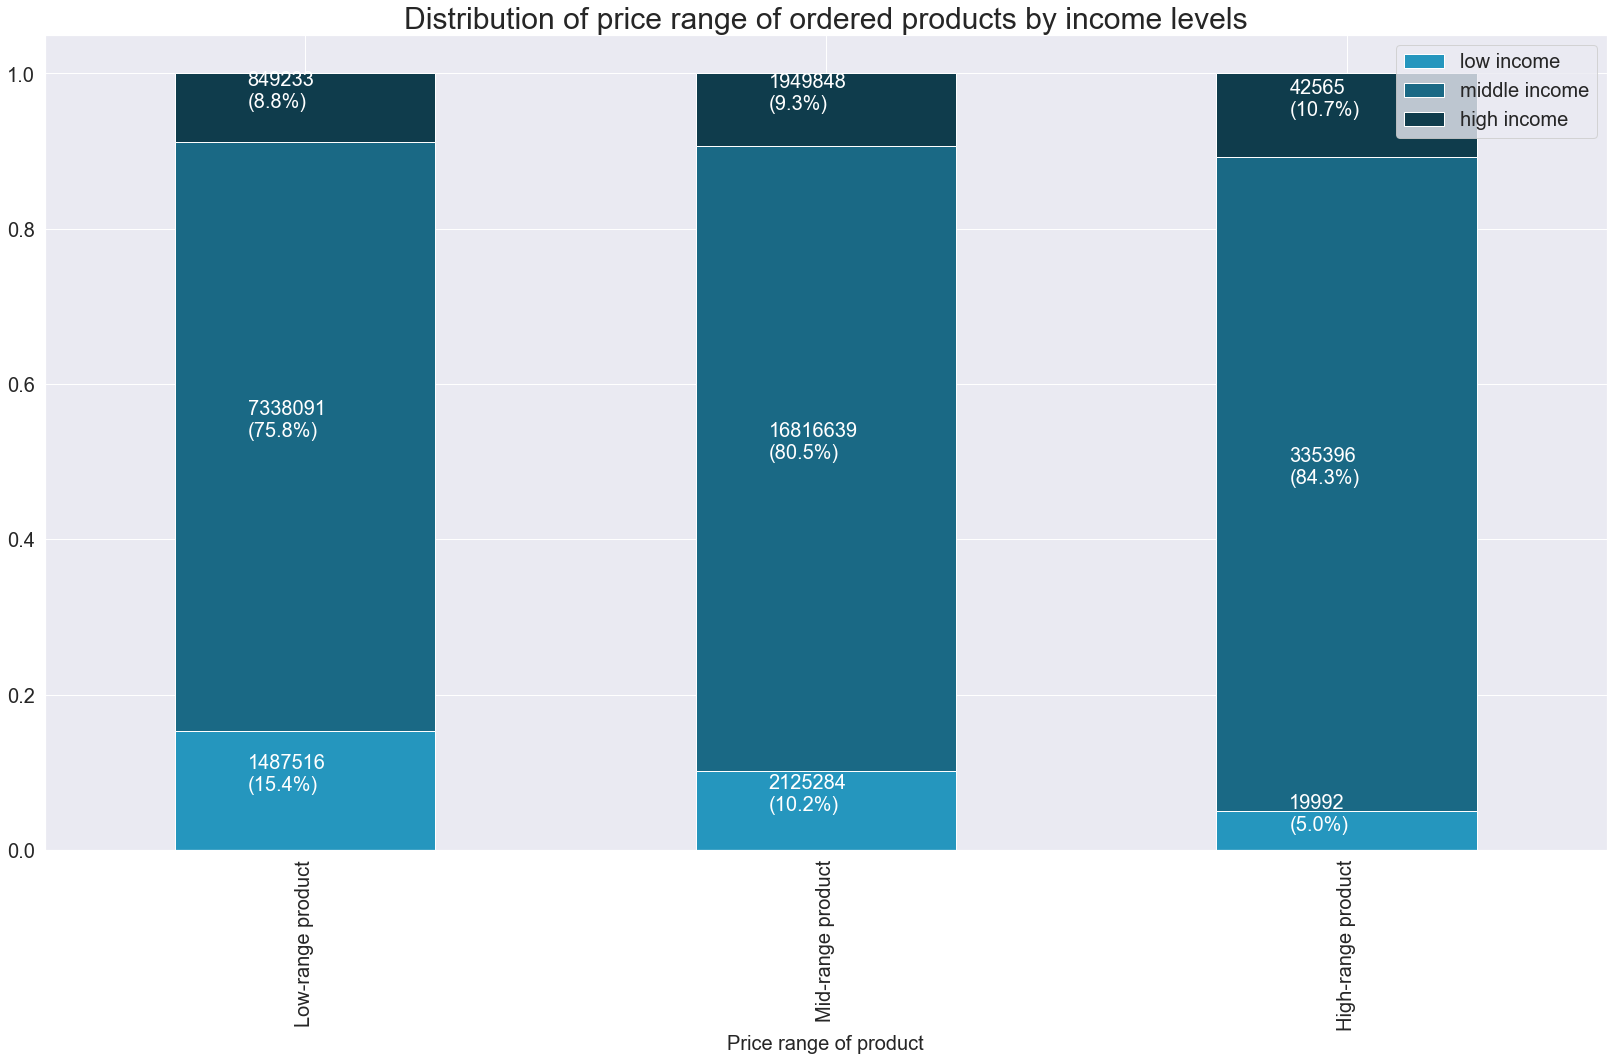

In [32]:
#Comparing level of income and price range of ordered products
bar_income_price=income_price.plot.bar(stacked=True,color=['#2596be', '#1a6985','#0f3c4c'], fontsize=20)
plt.title('Distribution of price range of ordered products by income levels', fontsize=30)
plt.xlabel('Price range of product', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*income_price.index.values]):
    for (proportion, count, x_loc) in zip(income_price.loc[y],
                                         income_price_label.loc[y],
                                         income_price.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

In [33]:
#Loyalty flags by income groups
income_loyalty=pd.crosstab(df_unique['loyalty_flag'], df_unique['income_group'])
income_loyalty

income_group,high income,low income,middle income
loyalty_flag,,,
Loyal customer,1546,2280,13191
New customer,5404,12653,50693
Regular customer,6601,11885,58378


## d. Number of dependants Profile

In [34]:
#Precense of dependants by family statu
dependant=pd.crosstab(df_unique['fam_status'], df_unique['dependant_group'])
dependant

dependant_group,not parent,parent
fam_status,,
divorced/widowed,13831,0
living with parents and siblings,0,7608
married,0,114296
single,26896,0


In [35]:
#creating cross tabs to display labels and age group/departments
dependant_frequency=pd.crosstab(index=df_unique['order_frequency_flag'], columns=df_unique['dependant_group'], normalize='index')
dependant_frequency_label=pd.crosstab(index=df_unique['order_frequency_flag'], columns=df_unique['dependant_group'])
dependant_frequency_label


dependant_group,not parent,parent
order_frequency_flag,,
Frequent customer,18906,57021
Non-frequent customer,9146,27519
Regular customer,12675,37364


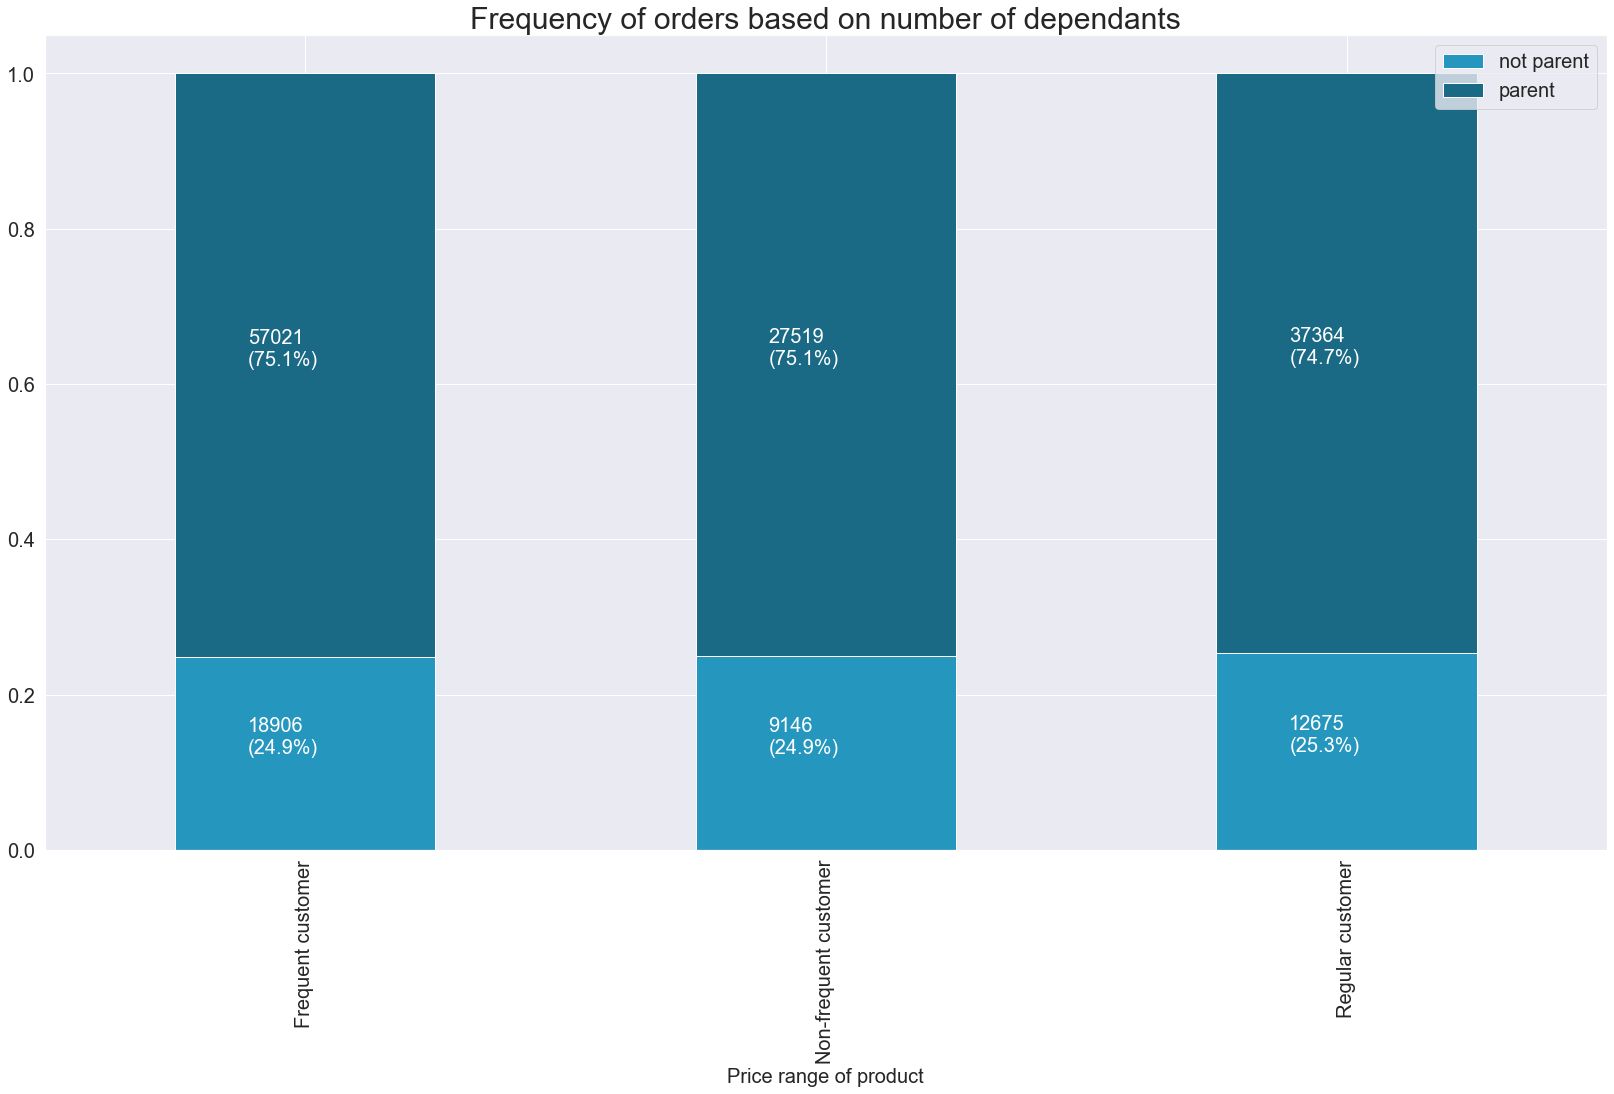

In [36]:
#Frequency of orders based on dependants
bar_dependant_frequency=dependant_frequency.plot.bar(stacked=True,color=['#2596be', '#1a6985','#0f3c4c'], fontsize=20)
plt.title('Frequency of orders based on number of dependants', fontsize=30)
plt.xlabel('frequency of order', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*dependant_frequency.index.values]):
    for (proportion, count, x_loc) in zip(dependant_frequency.loc[y],
                                        dependant_frequency_label.loc[y],
                                         dependant_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

## e. Baby stuff Profile

In [37]:
#creating cross tabs to display labels and age group/departments
baby_frequency=pd.crosstab(index=df_unique['order_frequency_flag'], columns=df_unique['baby_status'], normalize='index')
baby_frequency=baby_frequency.reindex(['Frequent customer', 'Regular customer','Non-frequent customer'])
baby_frequency=baby_frequency.rename(columns={0:'didn\'t buy baby stuff', 1:'bought baby stuff'})
baby_frequency_label=pd.crosstab(index=df_unique['order_frequency_flag'], columns=df_unique['baby_status'])
baby_frequency_label=baby_frequency_label.reindex(['Frequent customer', 'Regular customer','Non-frequent customer'])
baby_frequency_label=baby_frequency_label.rename(columns={0:'didn\'t buy baby stuff', 1:'bought baby stuff'})
baby_frequency_label

baby_status,didn't buy baby stuff,bought baby stuff
order_frequency_flag,,
Frequent customer,57711,18216
Regular customer,42188,7851
Non-frequent customer,32502,4163


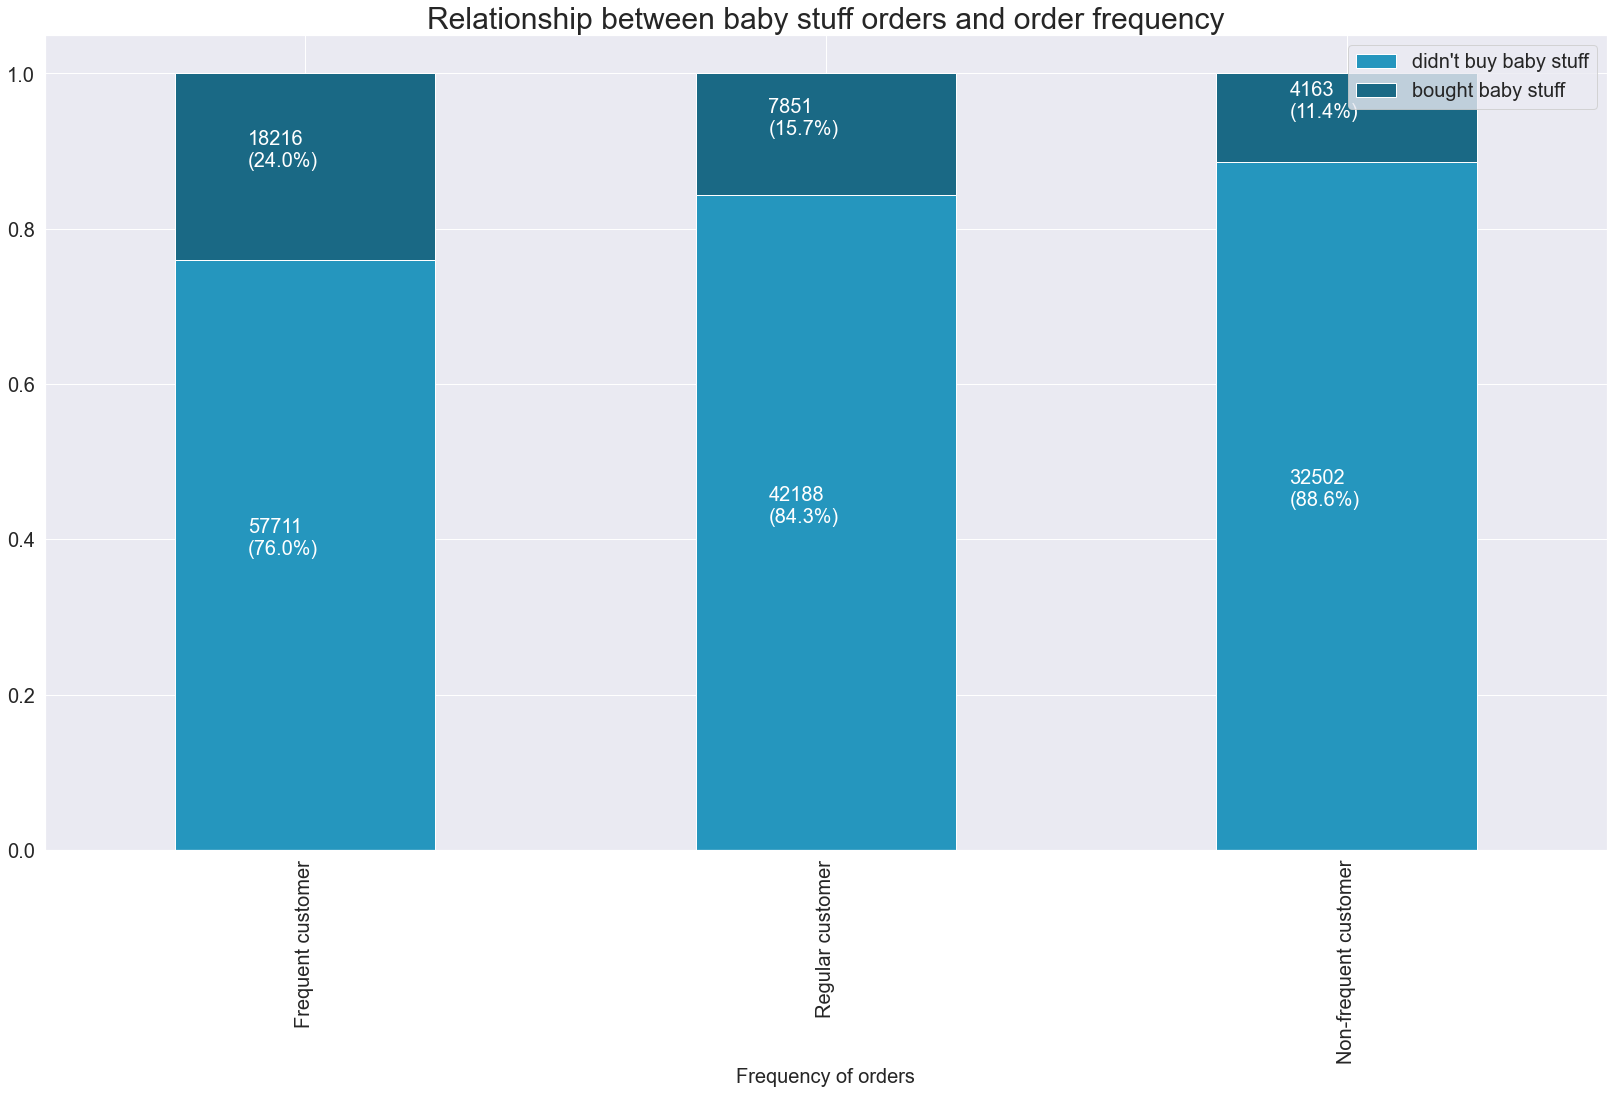

In [38]:
#Relationship between baby stuff orders and order frequency
bar_baby_frequency=baby_frequency.plot.bar(stacked=True,color=['#2596be', '#1a6985','#0f3c4c'], fontsize=20)
plt.title('Relationship between baby stuff orders and order frequency', fontsize=30)
plt.xlabel('Frequency of orders', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*baby_frequency.index.values]):
    for (proportion, count, x_loc) in zip(baby_frequency.loc[y],
                                       baby_frequency_label.loc[y],
                                        baby_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

## f. Pet Profile

In [39]:
#creating cross tabs to display regions and ordering pet stuff
pet_region=pd.crosstab(index=df_unique['region'], columns=df_unique['pet_status'], normalize='index')
pet_region=pet_region.reindex(['South', 'West','Midwest',  'Northeast'])
pet_region=pet_region.rename(columns={0:'didn\'t buy pet stuff', 1:'bought pet stuff'})
pet_region_labels=pd.crosstab(index=df_unique['region'], columns=df_unique['pet_status'])
pet_region_labels=pet_region_labels.reindex(['South', 'West','Midwest',  'Northeast'])
pet_region_labels=pet_region_labels.rename(columns={0:'didn\'t buy pet stuff', 1:'bought pet stuff'})
pet_region_labels

pet_status,didn't buy pet stuff,bought pet stuff
region,,
South,49868,4325
West,38043,3438
Midwest,35263,3113
Northeast,26282,2299


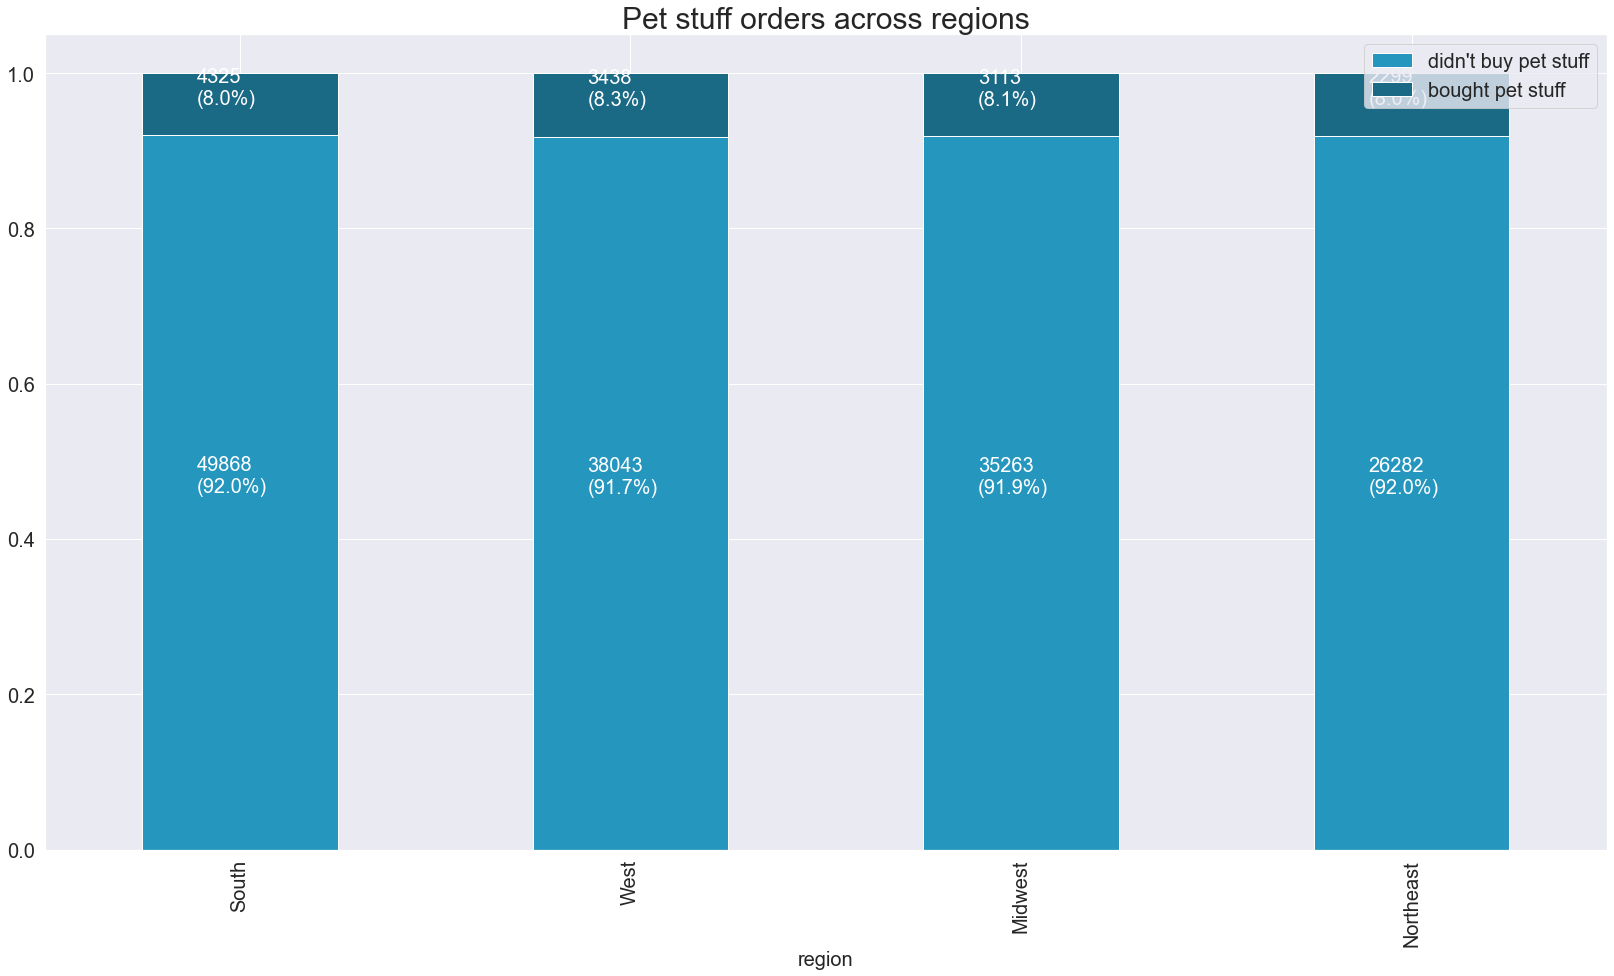

In [83]:
#Relationship between pet stuff orders and regions
pet_region_frequency=pet_region.plot.bar(stacked=True,color=['#2596be', '#1a6985','#0f3c4c'], fontsize=20)
plt.title('Pet stuff orders across regions', fontsize=30)
plt.xlabel('region', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*pet_region.index.values]):
    for (proportion, count, x_loc) in zip(pet_region.loc[y],
                                       pet_region_labels.loc[y],
                                        pet_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

# 03. Additional visualizations and analysis

In [41]:
#Dataframe for plotting linechart for orders
hour_day=df['order_hour_of_day'].value_counts().rename_axis('hour_of_day').reset_index(name='counts')
hour_day

,hour_of_day,counts
0,10,2649744
1,11,2614880
2,14,2567903
3,13,2539276
4,15,2535966
5,12,2495795
6,16,2413681
7,9,2363611
8,17,1982345
9,8,1659110


Text(0, 0.5, 'number of orders')

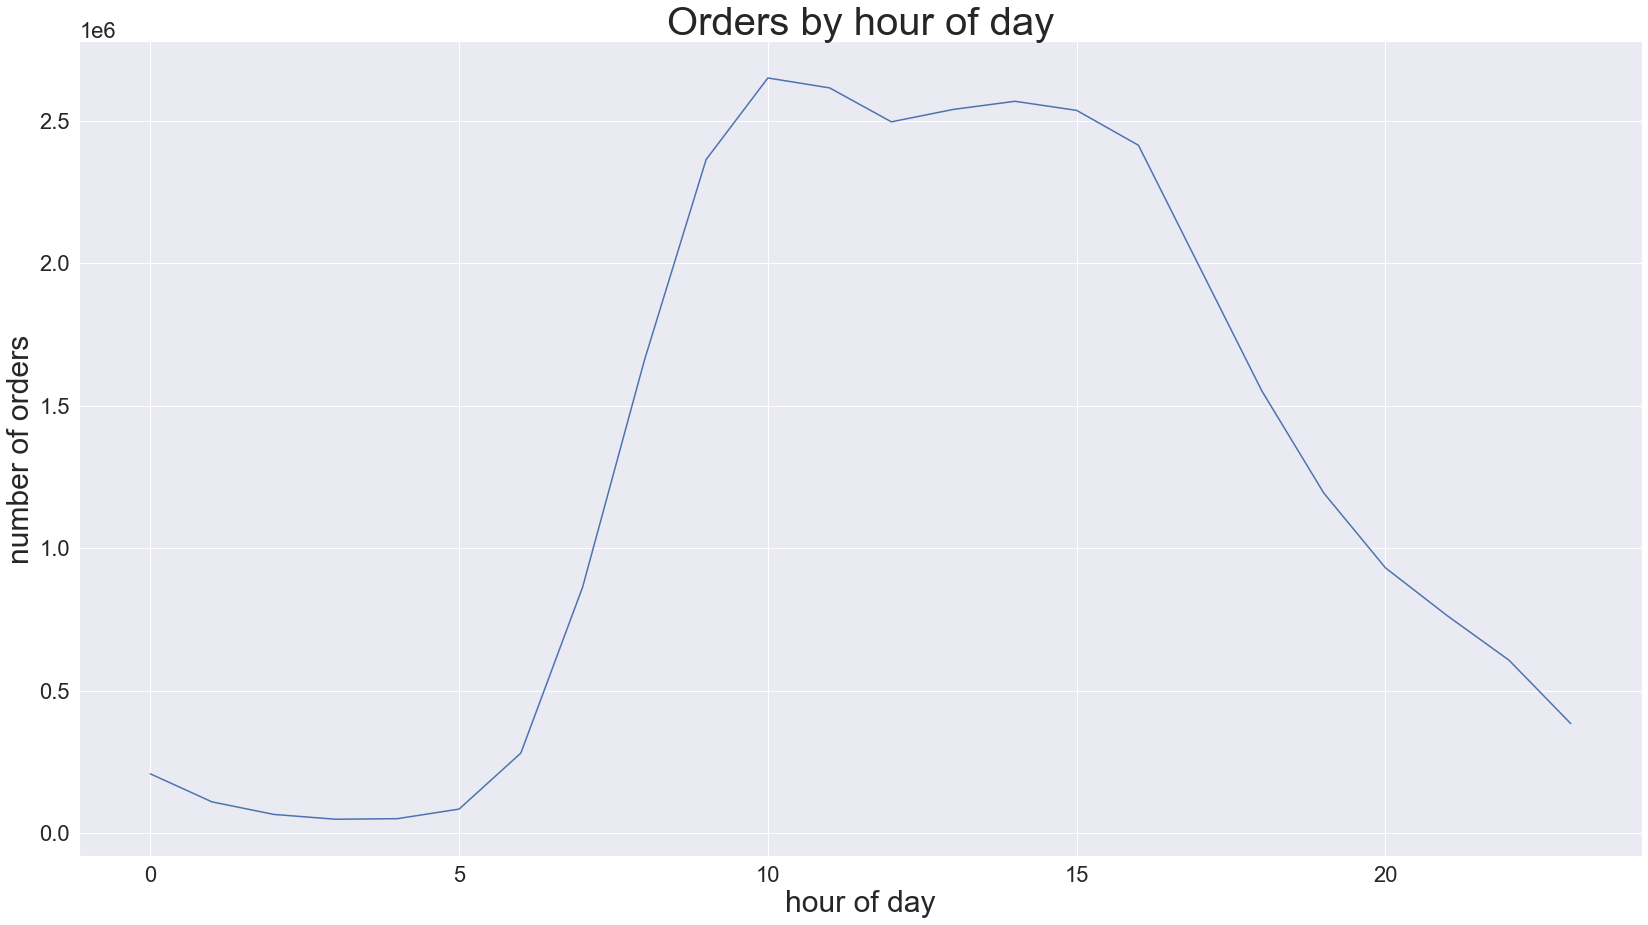

In [42]:
#Line chart of orders by hour of day
sns.set(font_scale = 2)
line_order_hour=sns.lineplot( data=hour_day, x='hour_of_day', y='counts', palette='#1a6985')
line_order_hour.axes.set_title("Orders by hour of day",fontsize=40)
line_order_hour.set_xlabel("hour of day",fontsize=30)
line_order_hour.set_ylabel("number of orders",fontsize=30)


In [43]:
#Dataframe for plotting linechart for orders
day_week=df['order_day_of_week'].value_counts().rename_axis('day_of_week').to_frame(name='counts')
day_week=day_week.rename({0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'})
day_week=day_week.reindex(['Saturday', 'Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday'])
day_week

,counts
day_of_week,
Saturday,5908610
Sunday,5411686
Monday,4024706
Tuesday,3669535
Wednesday,3624994
Thursday,4033729
Friday,4291304


Text(0, 0.5, 'number of orders')

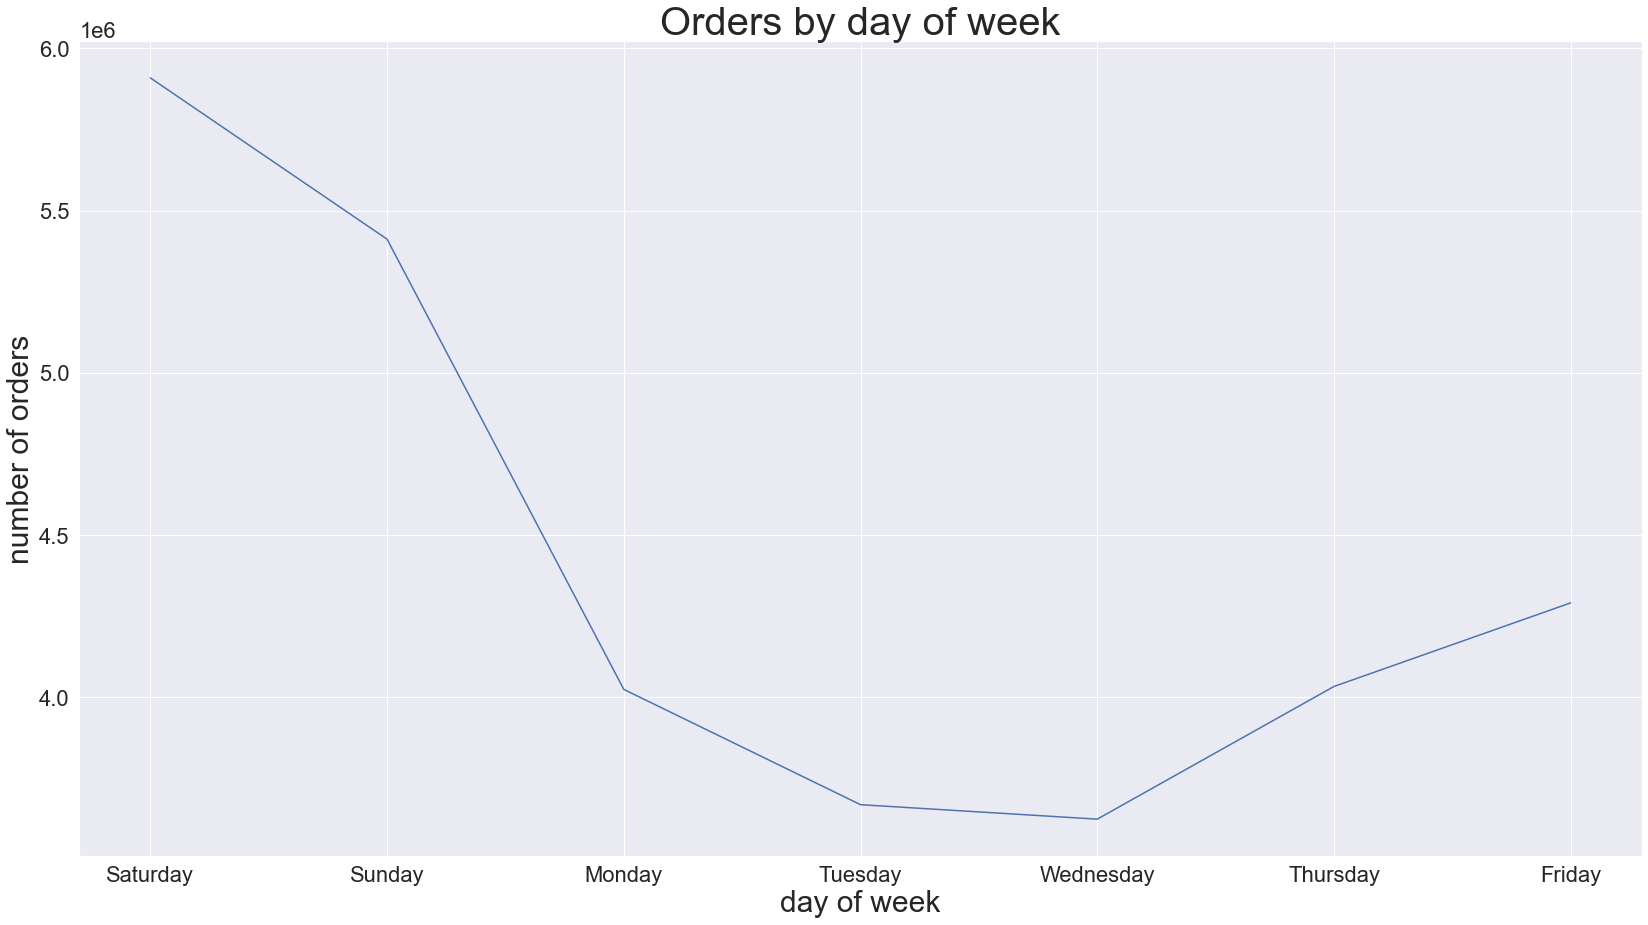

In [44]:
#Line chart of orders by day of week
sns.set(font_scale = 2)
line_order_day=sns.lineplot( data=day_week, x='day_of_week', y='counts', palette='#1a6985')
line_order_day.axes.set_title("Orders by day of week",fontsize=40)
line_order_day.set_xlabel("day of week",fontsize=30)
line_order_day.set_ylabel("number of orders",fontsize=30)

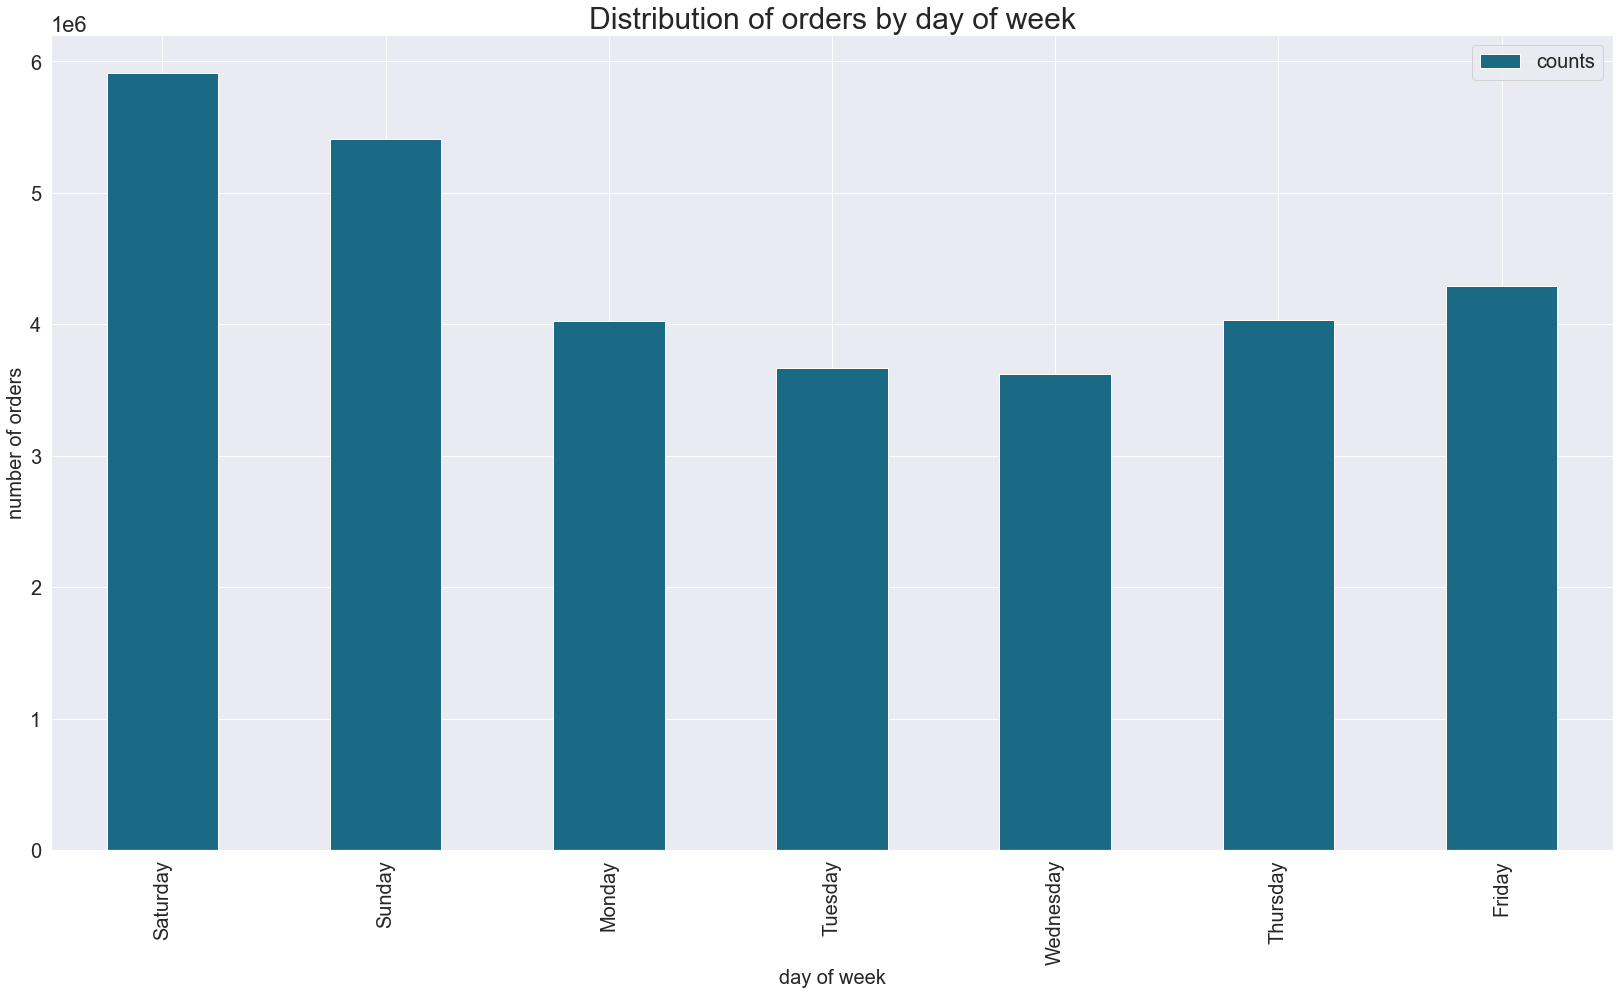

In [45]:
#Bar chart of orders by day of week
bar_order_week=day_week.plot.bar(color=['#1a6985'], fontsize=20)
plt.title('Distribution of orders by day of week', fontsize=30)
plt.xlabel('day of week', fontsize=20)
plt.ylabel('number of orders', fontsize=20)
plt.legend(fontsize=20)

In [46]:
#Data sampling
np.random.seed(4)
dev=np.random.rand(len(df))<=0.7
big=df[dev]
small=df[~dev]

Text(0, 0.5, 'average price of orders')

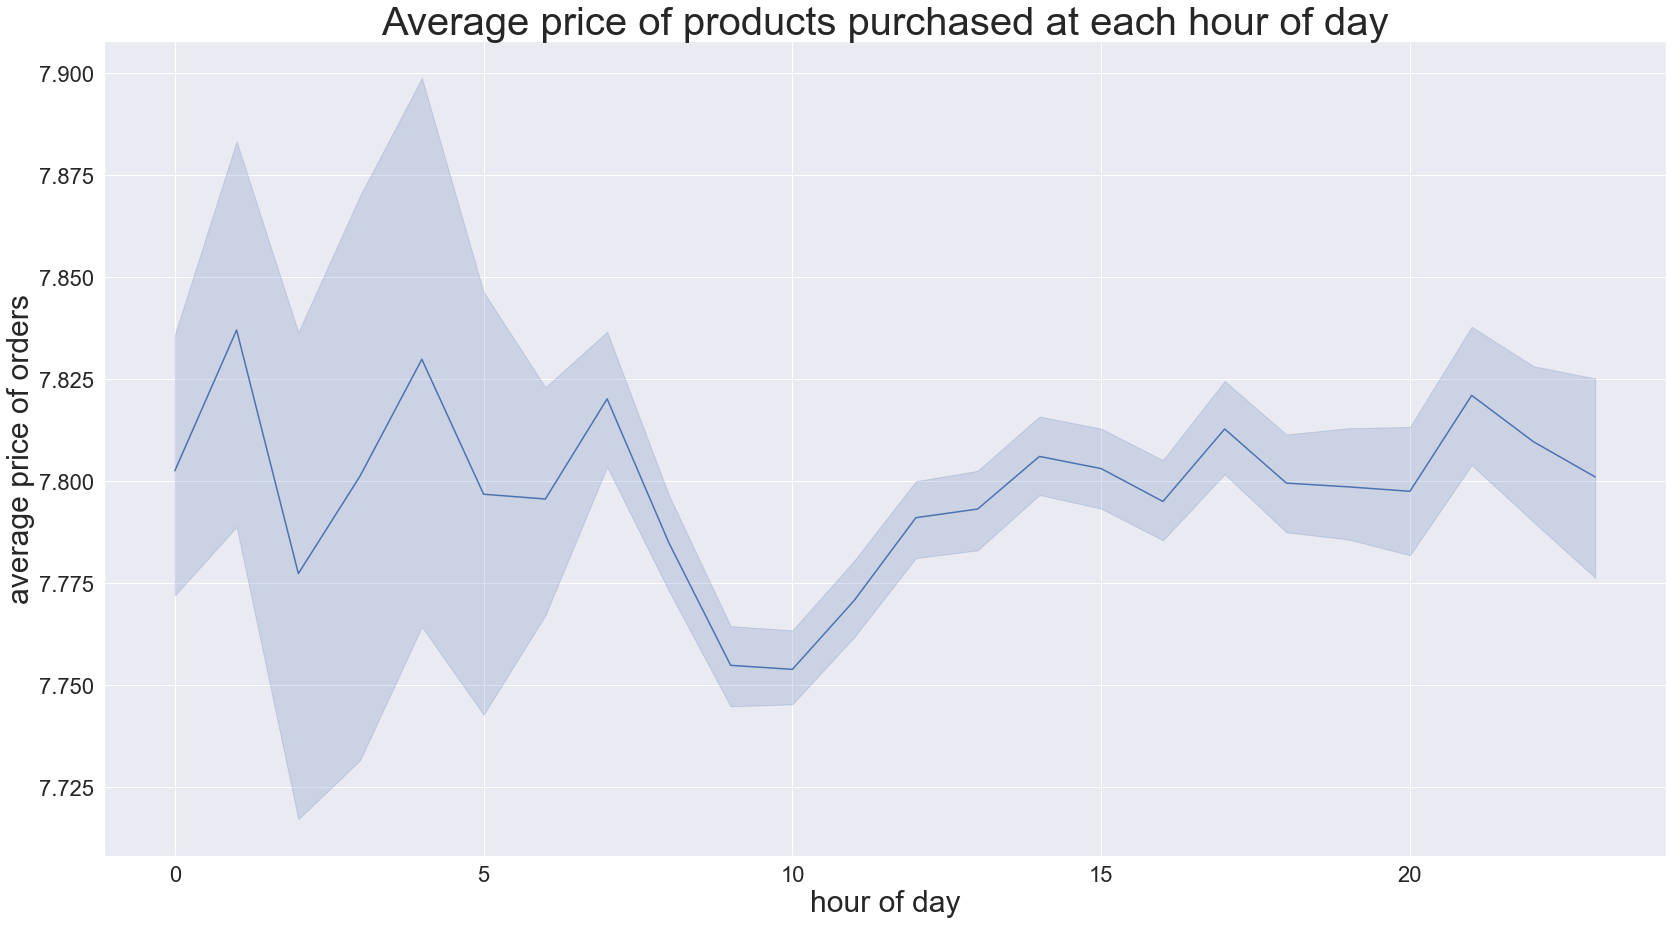

In [47]:
#Creating linechart average price of products purchased at each hour of day
sns.set(font_scale = 2)
line_order_price_hour=sns.lineplot( data=small, x='order_hour_of_day', y='prices', palette='#1a6985')
line_order_price_hour.axes.set_title("Average price of products purchased at each hour of day",fontsize=40)
line_order_price_hour.set_xlabel("hour of day",fontsize=30)
line_order_price_hour.set_ylabel("average price of orders",fontsize=30)

In [48]:
#Creating a subset with unique product names
df_product_unique=df.drop_duplicates(subset='product_name')

<AxesSubplot:title={'center':'Composition of products by price ranges'}>

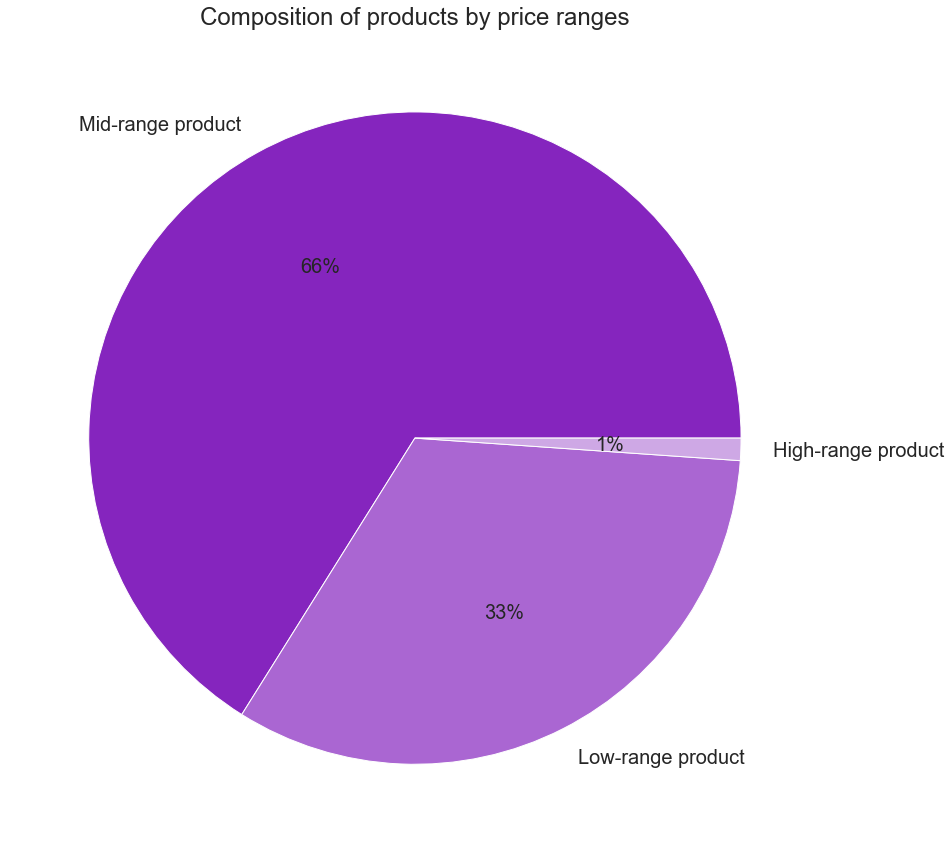

In [49]:
#Composition of products by price ranges
products=df_product_unique['price_range'].value_counts(dropna=False)
pie_product_range=products.plot.pie(title='Composition of products by price ranges', label='',autopct=('%1.f%%'), colors=['#8525be','#aa66d2', '#cea8e5'], textprops={'fontsize': 20})
pie_product_range

<AxesSubplot:title={'center':'Composition of orders by product ranges'}>

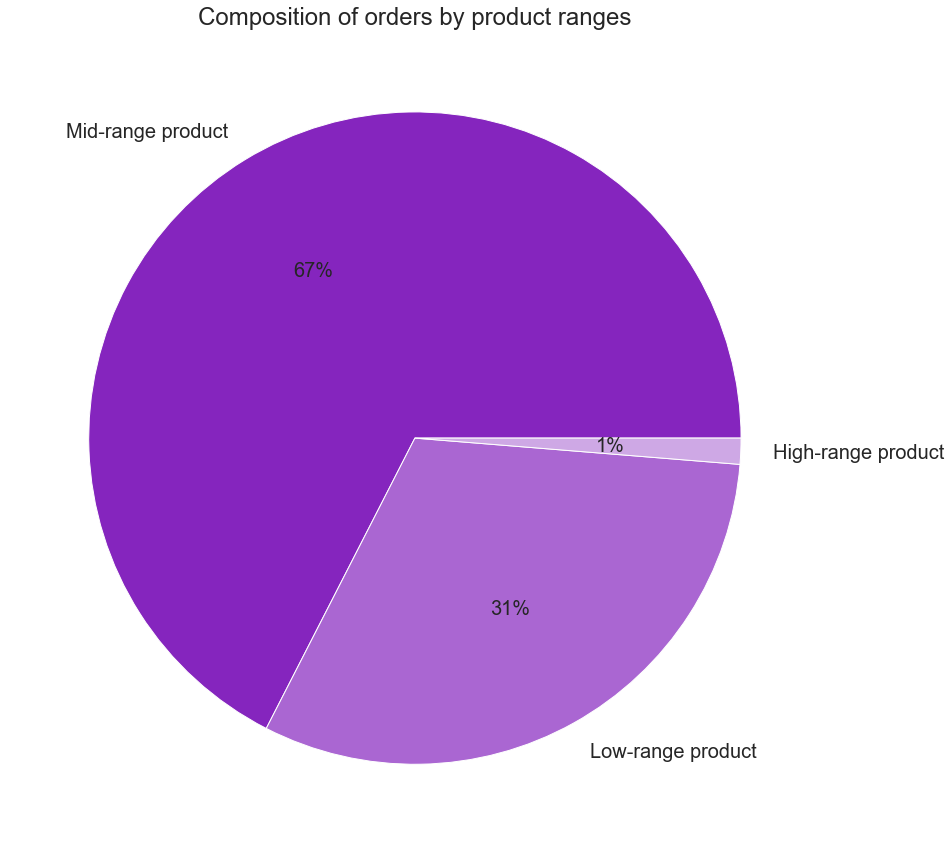

In [50]:
#Composition of orders by product ranges
products_prices=df['price_range'].value_counts(dropna=False)
pie_product_range_orders=products_prices.plot.pie(title='Composition of orders by product ranges', label='',autopct=('%1.f%%'), colors=['#8525be','#aa66d2', '#cea8e5'], textprops={'fontsize': 20})
pie_product_range_orders

<AxesSubplot:title={'center':'Composition of orders by product ranges'}>

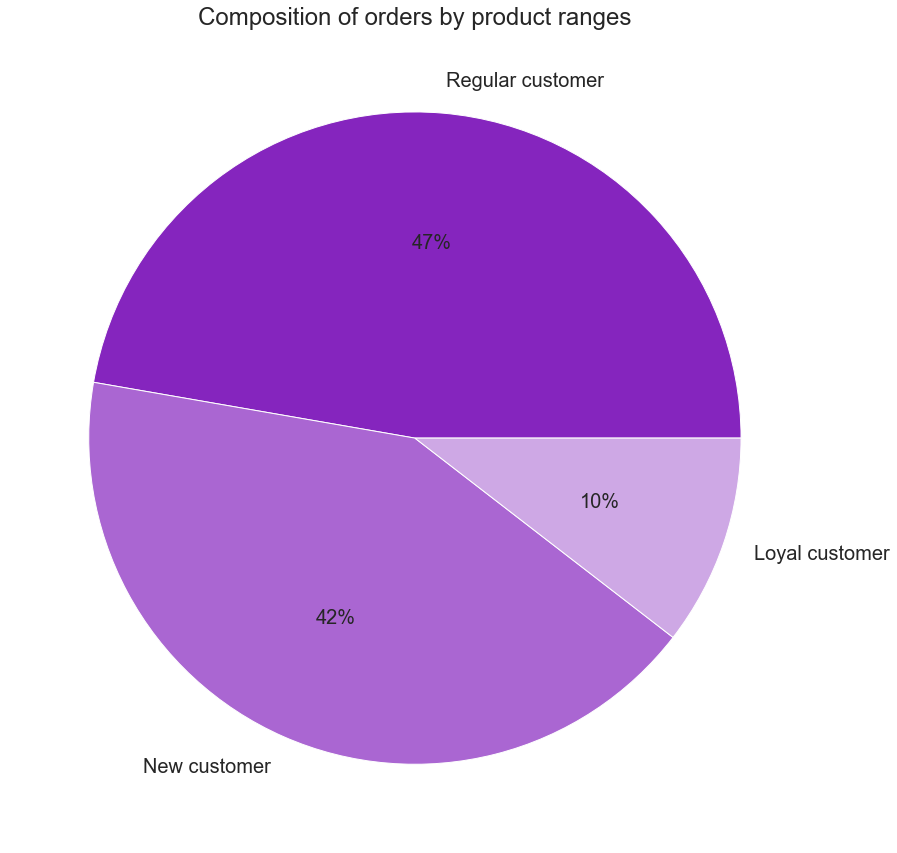

In [51]:
#Distribution of customers based on loyalty
customers_loyalty=df_unique['loyalty_flag'].value_counts(dropna=False)
pie_loyalty=customers_loyalty.plot.pie(title='Composition of orders by loyalty brands', label='',autopct=('%1.f%%'), colors=['#8525be','#aa66d2', '#cea8e5'], textprops={'fontsize': 20})
pie_loyalty


<AxesSubplot:title={'center':'Composition of orders by loyalty brands'}>

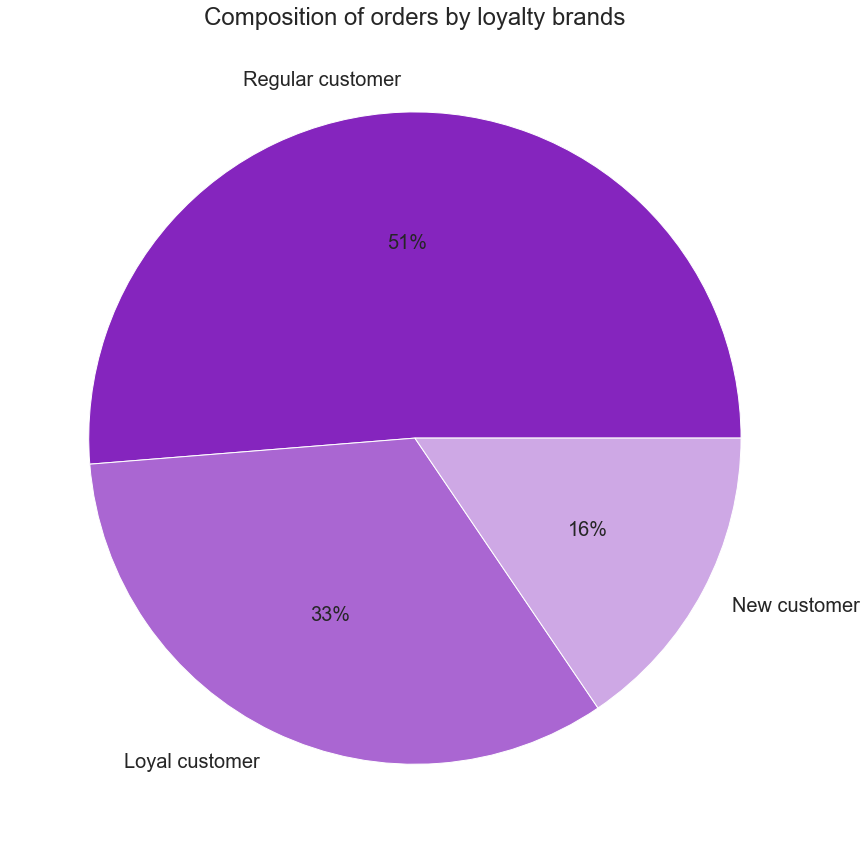

In [62]:
# Distribution of orders based on brand loyalty
customers_loyalty_orders=df['loyalty_flag'].value_counts(dropna=False)
pie_loyalty_orders=customers_loyalty_orders.plot.pie(title='Composition of orders by loyalty brands', label='',autopct=('%1.f%%'), colors=['#8525be','#aa66d2', '#cea8e5'], textprops={'fontsize': 20})
pie_loyalty_orders

In [53]:
df.columns

Index(['order_id', 'customer_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'prices',
       'price_range', 'busiest_day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag', 'median_order_days',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'fam_status', 'income', 'department', 'region',
       'activity', 'age_group', 'income_group', 'dependant_group',
       'baby_status', 'pet_status', 'vegan_status', 'alcohol_status'],
      dtype='object')

In [54]:
#Difference in spending habits among customers based on loyalty flag
df_unique.groupby(['loyalty_flag']).agg({'prices':['mean', 'min', 'max']})

prices                
                      mean  min        max
loyalty_flag                              
Loyal customer    7.765625  1.0  14.898438
New customer      7.585938  1.0  19.406250
Regular customer  7.617188  1.0  15.000000

In [55]:
#Difference in ordering frequency among customers based on loyalty flag
loyalty_order_frequency=df_unique.groupby(['loyalty_flag']).agg({'median_order_days':['mean', 'min', 'max']})
loyalty_order_frequency

median_order_days           
                              mean  min   max
loyalty_flag                                 
Loyal customer            5.304688  0.0  14.0
New customer             18.343750  0.0  30.0
Regular customer         11.546875  0.0  30.0

In [56]:
#Distribution of customers across regions
loyalty_region=pd.crosstab(df_unique['region'], df_unique['loyalty_flag'], normalize='index')
loyalty_region=loyalty_region.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns').reindex(['South', 'West','Midwest',  'Northeast'])
loyalty_region_labels=pd.crosstab(index=df_unique['region'], columns=df_unique['loyalty_flag'])
loyalty_region_labels=loyalty_region_labels.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns').reindex(['South', 'West','Midwest',  'Northeast'])
loyalty_region_labels

loyalty_flag,New customer,Regular customer,Loyal customer
region,,,
South,22947,25609,5637
West,17551,19568,4362
Midwest,16190,18195,3991
Northeast,12062,13492,3027


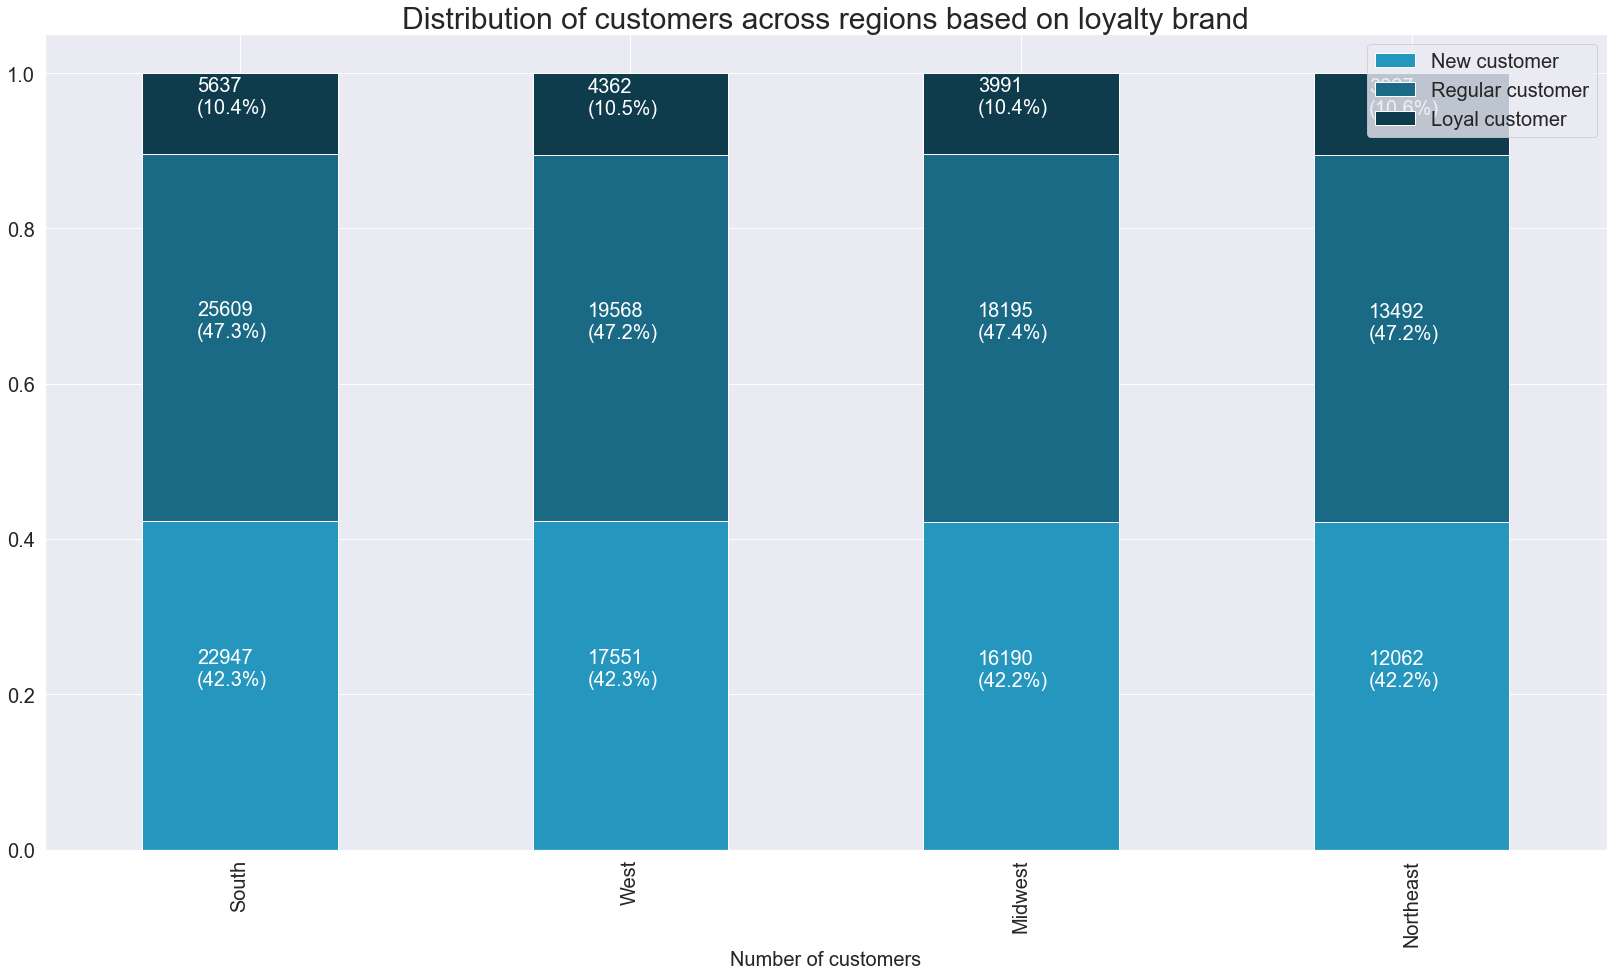

In [57]:
bar_loyalty_region=loyalty_region.plot.bar(stacked=True,color=['#2596be', '#1a6985','#0f3c4c'], fontsize=20)
plt.title('Distribution of customers across regions based on loyalty brand', fontsize=30)
plt.xlabel('Number of customers', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*pet_region.index.values]):
    for (proportion, count, x_loc) in zip(loyalty_region.loc[y],
                                     loyalty_region_labels.loc[y],
                                        loyalty_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

In [69]:
#Spending habits of customers based on loyalty brand
df_loyalty_product_range=pd.crosstab(df['price_range'], df_unique['loyalty_flag'], normalize='index')
df_loyalty_product_range=df_loyalty_product_range.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns')
df_loyalty_product_range_labels=pd.crosstab(index=df_unique['price_range'], columns=df_unique['loyalty_flag'])
df_loyalty_product_range_labels=df_loyalty_product_range_labels.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns')
df_loyalty_product_range_labels

loyalty_flag,New customer,Regular customer,Loyal customer
price_range,,,
High-range product,12,9,0
Low-range product,22839,24621,4929
Mid-range product,45899,52234,12088


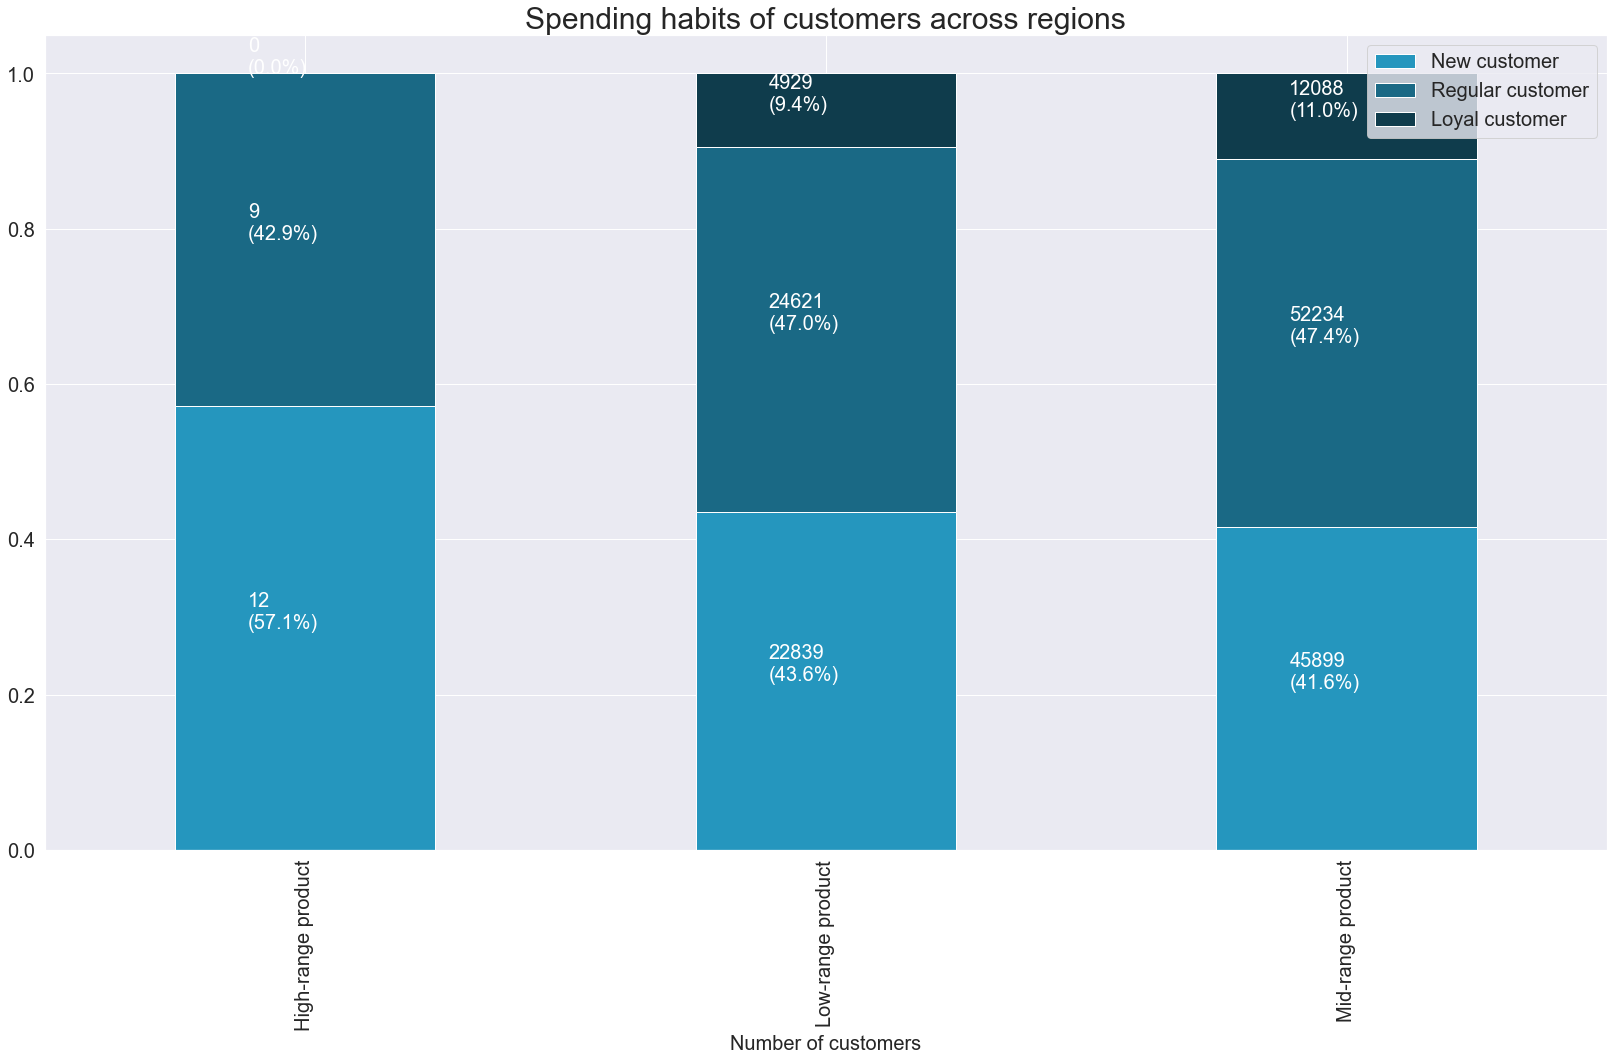

In [81]:
bar_loyalty_product_range=df_loyalty_product_range.plot.bar(stacked=True,color=['#2596be', '#1a6985','#0f3c4c'], fontsize=20)
plt.title('Spending habits of customers across regions', fontsize=30)
plt.xlabel('Number of customers', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*df_loyalty_product_range.index.values]):
    for (proportion, count, x_loc) in zip(df_loyalty_product_range.loc[y],
                                     df_loyalty_product_range_labels.loc[y],
                                        df_loyalty_product_range.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

In [76]:
#Distribution of orders based on region
df_region_product_range=pd.crosstab(df['region'], df_unique['price_range'], normalize='index')
df_region_product_range=df_region_product_range.reindex(['Low-range product', 'Mid-range product', 'High-range product'], axis='columns').reindex(['South', 'West', 'Midwest', 'Northeast'])
df_region_product_range_labels=pd.crosstab(index=df_unique['region'], columns=df_unique['price_range'])
df_region_product_range_labels=df_region_product_range_labels.reindex(['Low-range product', 'Mid-range product', 'High-range product'], axis='columns').reindex(['South', 'West', 'Midwest', 'Northeast'])
df_region_product_range_labels

price_range,Low-range product,Mid-range product,High-range product
region,,,
South,17556,36633,4
West,13305,28167,9
Midwest,12273,26099,4
Northeast,9255,19322,4


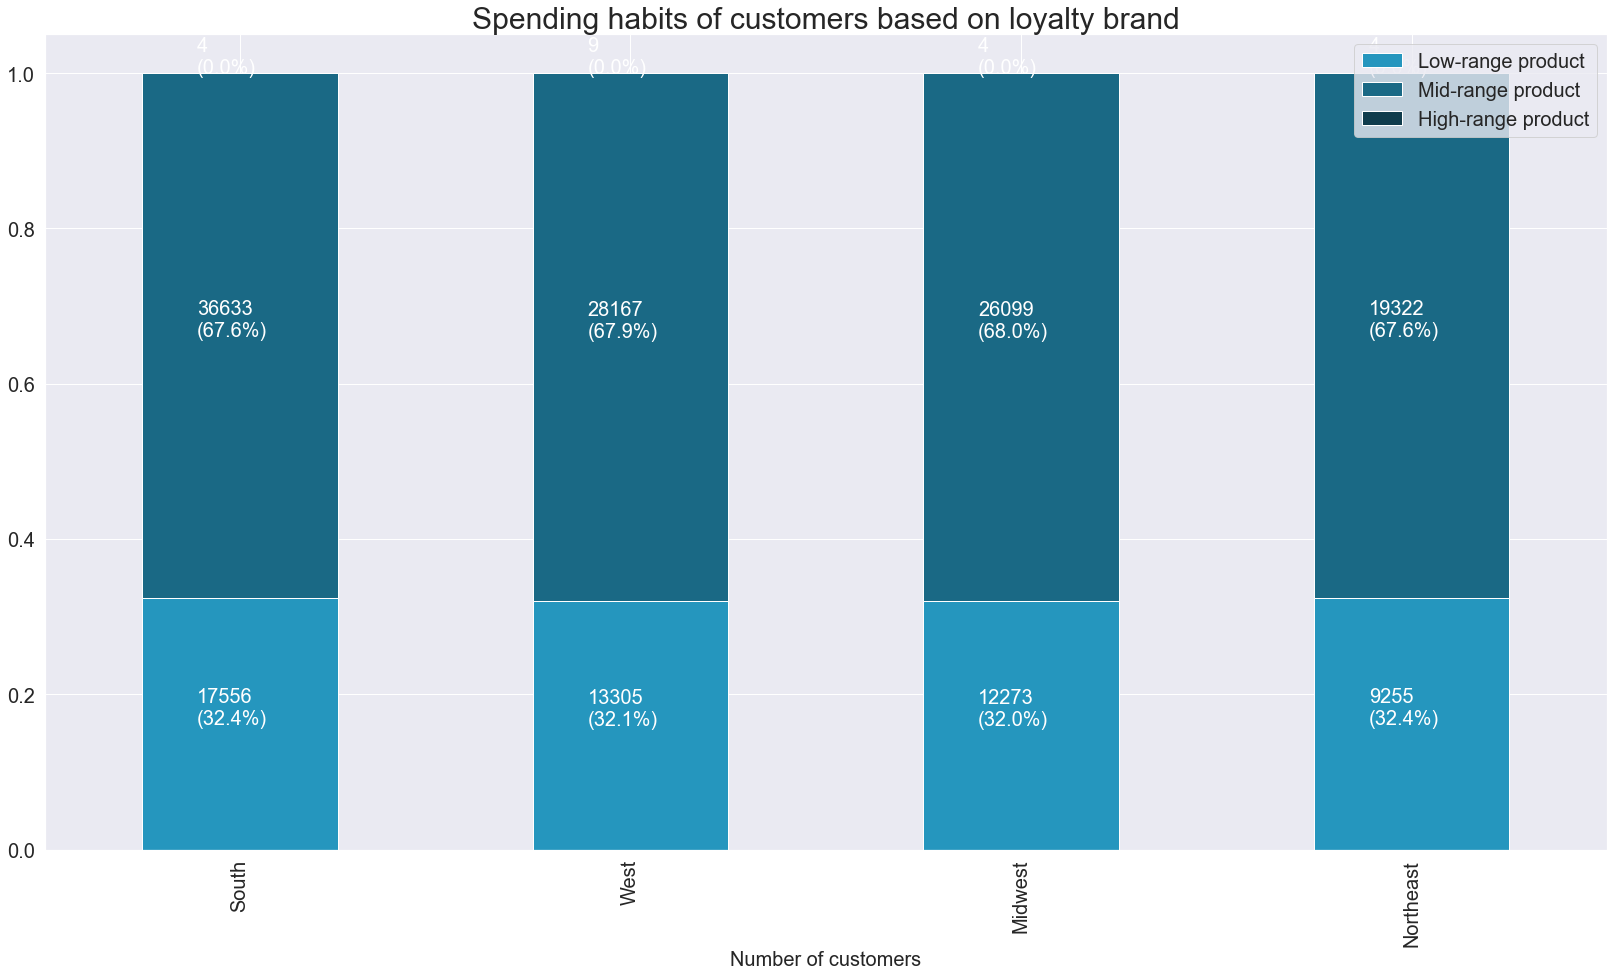

In [77]:
bar_region_product_range=df_region_product_range.plot.bar(stacked=True,color=['#2596be', '#1a6985','#0f3c4c'], fontsize=20)
plt.title('Spending habits of customers based on loyalty brand', fontsize=30)
plt.xlabel('Number of customers', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*df_region_product_range.index.values]):
    for (proportion, count, x_loc) in zip(df_region_product_range.loc[y],
                                     df_region_product_range_labels.loc[y],
                                        df_region_product_range.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

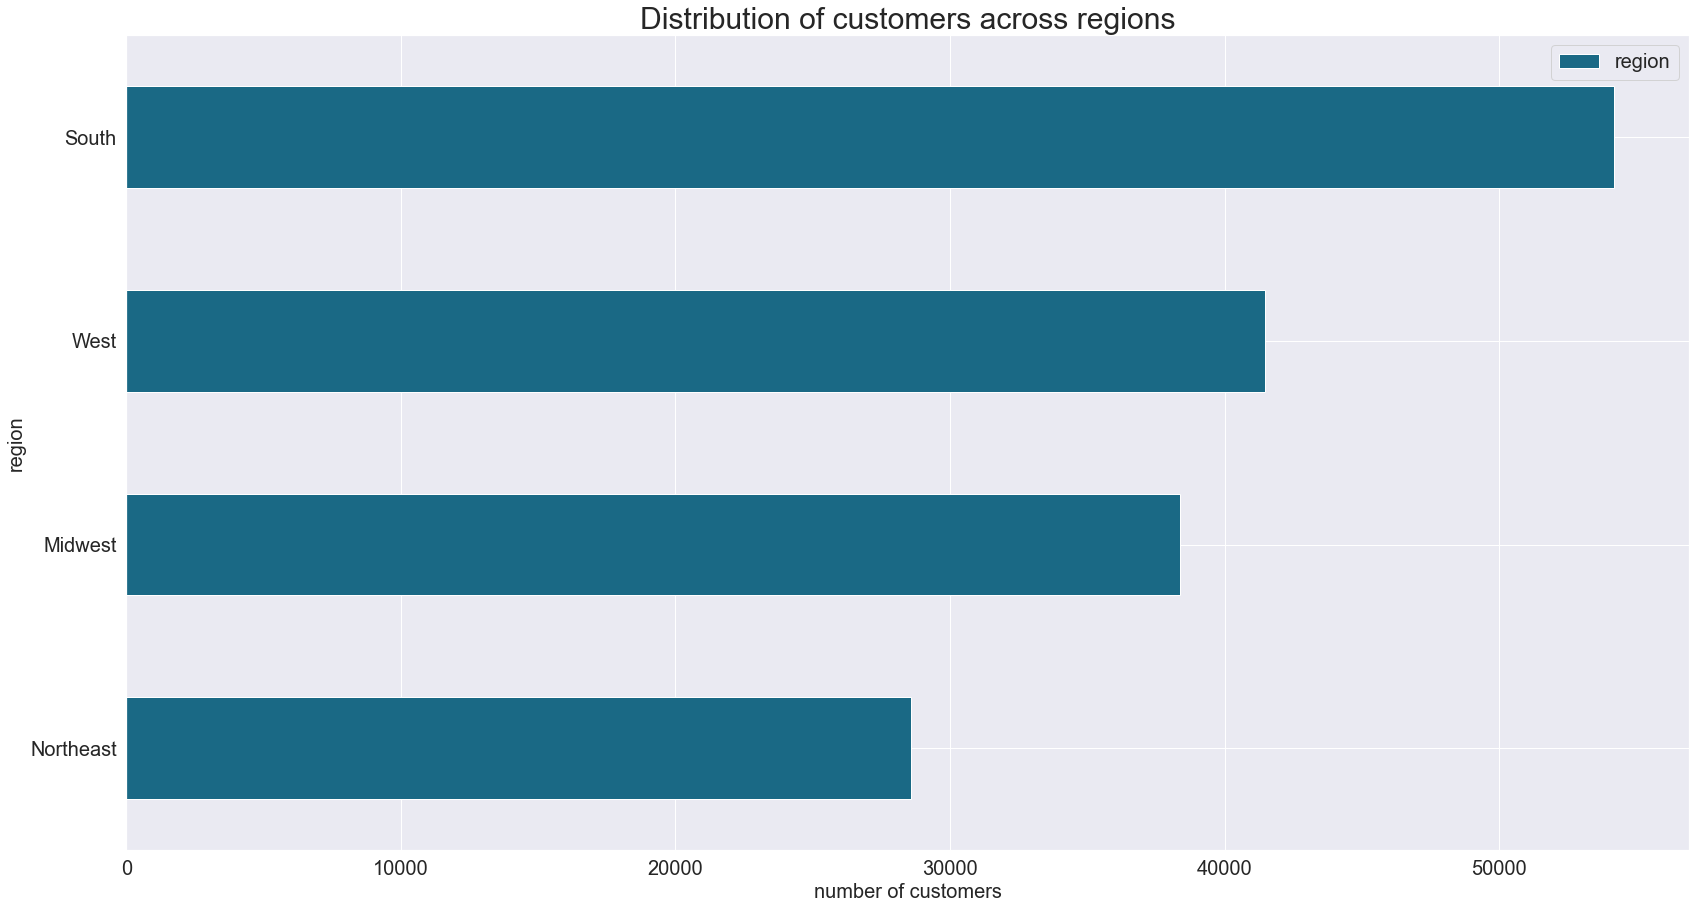

In [79]:
#Distribution of customers across regions
bar_region_customers=df_unique['region'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(color=['#1a6985'], fontsize=20)
plt.title('Distribution of customers across regions', fontsize=30)
plt.xlabel('number of customers', fontsize=20)
plt.ylabel('region', fontsize=20)
plt.legend(fontsize=20)

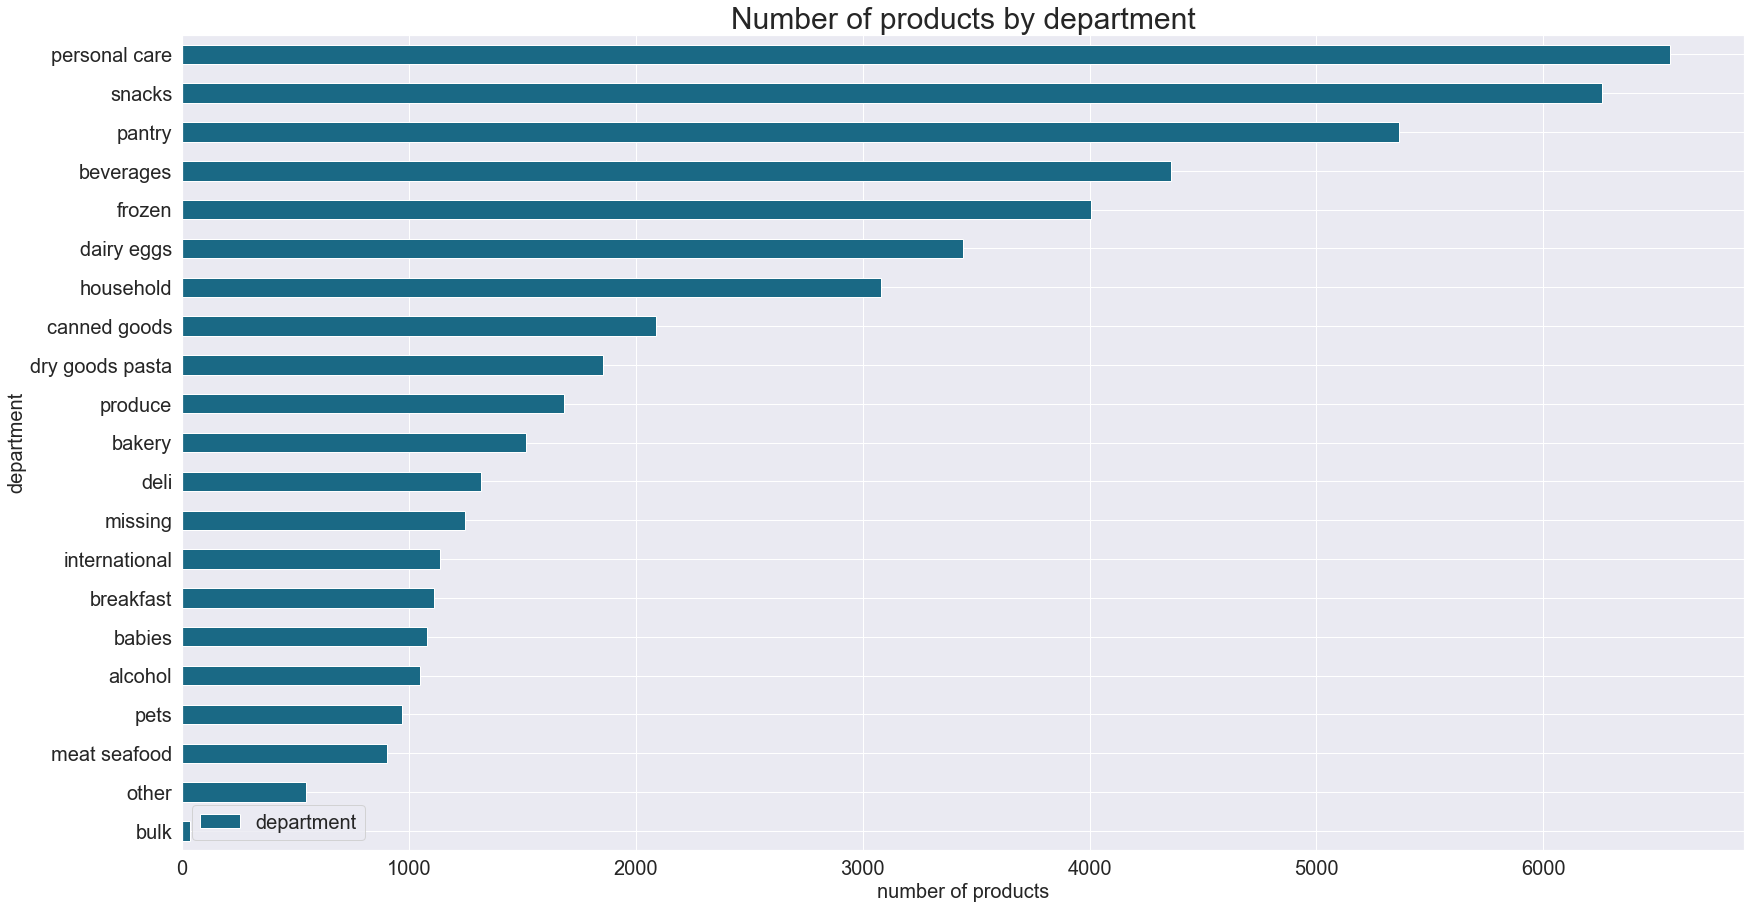

In [64]:
#Number of products by department
bar_department_orders=df_product_unique['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(color=['#1a6985'], fontsize=20)
plt.title('Number of products by department', fontsize=30)
plt.xlabel('number of products', fontsize=20)
plt.ylabel('department', fontsize=20)
plt.legend(fontsize=20)

# 04. Exporting visualizations

In [58]:
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.png'))
bar_department_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_orders.png'))
bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_department.png'))
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region.png'))
bar_income_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_price.png'))
bar_dependant_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependant_frequency.png'))
bar_baby_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_baby_frequency.png'))
pet_region_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_region_frequency.png'))
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_region.png'))

In [90]:
pie_loyal_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyal_age.png'))
pie_regular_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_regular_age.png'))
pie_new_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_new_age.png'))
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))
pie_product_range_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_product_range_orders.png'))
pie_product_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_product_range.png'))
pie_loyalty_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty_orders.png'))

In [60]:
line_age_ordertime.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_ordertime.png'))
line_age_orderday.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_orderday.png'))
line_order_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour.png'))
line_order_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_day.png'))
line_order_price_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_price_hour.png'))

In [82]:
bar_order_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_weekday.png'))
bar_department_products.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_products.png'))
bar_loyalty_product_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_product_range.png'))
bar_region_product_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_product_range.png'))
bar_region_customers.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_customers.png'))